In [160]:
import os
os.chdir("C:/Users/hp/Documents")

import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

In [161]:
data1 = pd.read_csv("Week1.csv", na_values=['?', None])

In [162]:
data1.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
print(f" There are {data1.shape[0]} rows and {data1.shape[1]} columns")

 There are 150001 rows and 55 columns


In [12]:
data1.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb 

### Missing value

In [13]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):
     # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data1)

The Diabetes dataset contains 12.5 % missing values.


In [18]:
# Let's now find  which column(s) has missing values
n= data1.isna().sum()
print(n)

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### columns with more than 30% missing values

In [20]:
#let's find  columns with more than 30% missing values
t= (n/data1.shape[0])*100
print(t)

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [37]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns


In [38]:
missing_values_table(data1)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


In [150]:
# let's drop columns with more than 30% missing values
data1_clean = data1.drop(['Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 125000B < Vol DL', 
                    'TCP UL Retrans. Vol (Bytes)', 'Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 1250B < Vol UL < 6250B',
                   'Nb of sec with 1250B < Vol UL < 6250B','TCP DL Retrans. Vol (Bytes)','Nb of sec with 6250B < Vol DL < 31250B',
                   'HTTP UL (Bytes)','HTTP DL (Bytes)'],axis=1)


print(f" There are now {data1_clean.shape[0]} rows and {data1_clean.shape[1]} columns")


 There are now 150001 rows and 45 columns


## Let's  fill missing value with appropriate method

In [151]:
#fix the missing values
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

In [152]:
data1_clean['Avg RTT DL (ms)'] = data1_clean['Avg RTT DL (ms)'].fillna(data1_clean['Avg RTT DL (ms)'].mean())
data1_clean['Avg RTT UL (ms)'] = data1_clean['Avg RTT DL (ms)'].fillna(data1_clean['Avg RTT DL (ms)'].mean())
data1_clean['MSISDN/Number'] = fix_missing_ffill(data1_clean, 'MSISDN/Number')
data1_clean['Bearer Id'] = data1_clean['Bearer Id'].fillna(data1_clean['Bearer Id'].mode()[0])
data1_clean['Last Location Name'] = fix_missing_ffill(data1_clean, 'Last Location Name')
data1_clean['Handset Type'] = data1_clean['Handset Type'].fillna(data1_clean['Handset Type'].mode()[0])
data1_clean['End'] = data1_clean['End'].fillna(data1_clean['End'].mode()[0])
data1_clean['Start'] = data1_clean['Start'].fillna(data1_clean['Start'].mode()[0])
data1_clean['Nb of sec with Vol UL < 1250B'] = data1_clean['Nb of sec with Vol UL < 1250B'].fillna(data1_clean['Nb of sec with Vol UL < 1250B'].median())
data1_clean['UL TP > 300 Kbps (%)'] = data1_clean['UL TP > 300 Kbps (%)'].fillna(data1_clean['UL TP > 300 Kbps (%)'].median())
data1_clean['50 Kbps < UL TP < 300 Kbps (%)'] = data1_clean['50 Kbps < UL TP < 300 Kbps (%)'].fillna(data1_clean['50 Kbps < UL TP < 300 Kbps (%)'].median())
data1_clean['10 Kbps < UL TP < 50 Kbps (%)'] = data1_clean['10 Kbps < UL TP < 50 Kbps (%)'].fillna(data1_clean['10 Kbps < UL TP < 50 Kbps (%)'].median())
data1_clean['UL TP < 10 Kbps (%)'] = data1_clean['UL TP < 10 Kbps (%)'].fillna(data1_clean['UL TP < 10 Kbps (%)'].median())
data1_clean['Nb of sec with Vol DL < 6250B'] = data1_clean['Nb of sec with Vol DL < 6250B'].fillna(data1_clean['Nb of sec with Vol DL < 6250B'].median())
data1_clean['DL TP < 50 Kbps (%)'] = data1_clean['DL TP < 50 Kbps (%)'].fillna(data1_clean['DL TP < 50 Kbps (%)'].median())
data1_clean['250 Kbps < DL TP < 1 Mbps (%)'] = data1_clean['250 Kbps < DL TP < 1 Mbps (%)'].fillna(data1_clean['250 Kbps < DL TP < 1 Mbps (%)'].median())
data1_clean['50 Kbps < DL TP < 250 Kbps (%)'] = data1_clean['50 Kbps < DL TP < 250 Kbps (%)'].fillna(data1_clean['50 Kbps < DL TP < 250 Kbps (%)'].median())
data1_clean['DL TP > 1 Mbps (%)'] = data1_clean['DL TP > 1 Mbps (%)'].fillna(data1_clean['DL TP > 1 Mbps (%)'].median())
data1_clean['Handset Manufacturer'] = data1_clean['Handset Manufacturer'].fillna(data1_clean['Handset Manufacturer'].mode()[0])
data1_clean['IMEI'] = data1_clean['IMEI'].fillna(data1_clean['IMEI'].median())
data1_clean['IMSI'] = data1_clean['IMSI'].fillna(data1_clean['IMSI'].median())
data1_clean['Start ms'] = data1_clean['Start ms'].fillna(data1_clean['Start ms'].median())
data1_clean['End ms'] = data1_clean['End ms'].fillna(data1_clean['End ms'].median())
data1_clean['Dur. (ms)'] = data1_clean['Dur. (ms)'].fillna(data1_clean['Dur. (ms)'].median())
data1_clean['Start ms'] = data1_clean['Start ms'].fillna(data1_clean['Start ms'].median())
data1_clean['Start ms'] = data1_clean['Start ms'].fillna(data1_clean['Start ms'].median())
data1_clean['Start ms'] = data1_clean['Start ms'].fillna(data1_clean['Start ms'].median())
data1_clean['Avg Bearer TP DL (kbps)'] = data1_clean['Avg Bearer TP DL (kbps)'].fillna(data1_clean['Avg Bearer TP DL (kbps)'].mean())
data1_clean['Avg Bearer TP UL (kbps)'] = data1_clean['Avg Bearer TP UL (kbps)'].fillna(data1_clean['Avg Bearer TP UL (kbps)'].mean())
data1_clean['Total UL (Bytes)'] = data1_clean['Total UL (Bytes)'].fillna(data1_clean['Total UL (Bytes)'].mean())
data1_clean['Dur. (ms).1'] = data1_clean['Dur. (ms).1'].fillna(data1_clean['Dur. (ms).1'].median())
data1_clean['Activity Duration DL (ms)'] = data1_clean['Activity Duration DL (ms)'].fillna(data1_clean['Activity Duration DL (ms)'].median())
data1_clean['Activity Duration UL (ms)'] = data1_clean['Activity Duration UL (ms)'].fillna(data1_clean['Activity Duration UL (ms)'].median())
data1_clean['Total DL (Bytes)'] = fix_missing_ffill(data1_clean, 'Total DL (Bytes)')


In [153]:
missing_values_table(data1_clean)

Your selected dataframe has 45 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


###  Data Transformation 

#### Scaling 
This means that we're transforming our data so that it fits within a specific scale, like 0-100 or 0-1. 

In [154]:
data1_clean.dtypes




Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
Activity Duration DL (ms)         float64
Activity Duration UL (ms)         

In [162]:
data1_clean1 = data1_clean.drop(['Start','Last Location Name', 'Handset Manufacturer', 'Handset Type','End', 'Bearer Id',
                                'MSISDN/Number','IMEI', 'IMSI'], axis=1)



data_scal = (data1_clean1-data1_clean1.min())/(data1_clean1.max()-data1_clean1.min())

In [156]:
data_scal.head()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0.770771,0.662663,0.980734,0.000433,0.000433,0.000061,0.000751,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000276,0.000268,0.980734,0.000351,0.000353,0.431046,0.370730,0.142574,0.308498,0.993697,0.147114,0.681651,0.113631,0.352502,0.438681,0.329697,0.866255,0.203620,0.532304,0.448991,0.336846
1,0.235235,0.606607,0.733164,0.000671,0.000671,0.000042,0.000444,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000001,0.000025,0.733164,0.001606,0.001690,0.537109,0.108775,0.304792,0.223269,0.175407,0.329274,0.870515,0.868242,0.788437,0.782626,0.721744,0.070697,0.624705,0.909191,0.674934,0.721401
2,0.001001,0.652653,0.731360,0.001133,0.001133,0.000016,0.000154,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.731360,0.001242,0.001149,0.469609,0.641020,0.744581,0.411045,0.750150,0.718667,0.848083,0.667798,0.756165,0.280002,0.272198,0.023889,0.486922,0.254587,0.331504,0.304394
3,0.486486,0.171171,0.709627,0.001133,0.001133,0.000116,0.000751,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000024,0.000261,0.709627,0.000026,0.000341,0.179615,0.203006,0.787213,0.676483,0.401474,0.674088,0.919559,0.688108,0.601682,0.049878,0.947947,0.655223,0.888074,0.772836,0.536111,0.936439
4,0.565566,0.954955,0.584100,0.001133,0.001133,0.000016,0.000154,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.584100,0.001003,0.000998,0.240540,0.761925,0.545083,0.364093,0.539992,0.185656,0.656060,0.861480,0.736250,0.018862,0.625658,0.213165,0.652929,0.840054,0.472752,0.627361


In [157]:

data_clean2 = pd.concat((data_scal, data1_clean[['Start','Last Location Name', 'Handset Manufacturer', 'Handset Type','End', 'Bearer Id','MSISDN/Number','IMEI', 'IMSI']]), 1)
data_clean2.head()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Start,Last Location Name,Handset Manufacturer,Handset Type,End,Bearer Id,MSISDN/Number,IMEI,IMSI
0,0.770771,0.662663,0.980734,0.000433,0.000433,0.000061,0.000751,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000276,0.000268,0.980734,0.000351,0.000353,0.431046,0.370730,0.142574,0.308498,0.993697,0.147114,0.681651,0.113631,0.352502,0.438681,0.329697,0.866255,0.203620,0.532304,0.448991,0.336846,4/4/2019 12:01,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F,4/25/2019 14:35,1.311448e+19,3.366496e+10,3.552121e+13,2.082014e+14
1,0.235235,0.606607,0.733164,0.000671,0.000671,0.000042,0.000444,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000001,0.000025,0.733164,0.001606,0.001690,0.537109,0.108775,0.304792,0.223269,0.175407,0.329274,0.870515,0.868242,0.788437,0.782626,0.721744,0.070697,0.624705,0.909191,0.674934,0.721401,4/9/2019 13:04,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),4/25/2019 8:15,1.311448e+19,3.368185e+10,3.579401e+13,2.082019e+14
2,0.001001,0.652653,0.731360,0.001133,0.001133,0.000016,0.000154,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.731360,0.001242,0.001149,0.469609,0.641020,0.744581,0.411045,0.750150,0.718667,0.848083,0.667798,0.756165,0.280002,0.272198,0.023889,0.486922,0.254587,0.331504,0.304394,4/9/2019 17:42,D42335A,Samsung,Samsung Galaxy A8 (2018),4/25/2019 11:58,1.311448e+19,3.376063e+10,3.528151e+13,2.082003e+14
3,0.486486,0.171171,0.709627,0.001133,0.001133,0.000116,0.000751,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000024,0.000261,0.709627,0.000026,0.000341,0.179615,0.203006,0.787213,0.676483,0.401474,0.674088,0.919559,0.688108,0.601682,0.049878,0.947947,0.655223,0.888074,0.772836,0.536111,0.936439,4/10/2019 0:31,T21824A,undefined,undefined,4/25/2019 7:36,1.311448e+19,3.375034e+10,3.535661e+13,2.082014e+14
4,0.565566,0.954955,0.584100,0.001133,0.001133,0.000016,0.000154,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.584100,0.001003,0.000998,0.240540,0.761925,0.545083,0.364093,0.539992,0.185656,0.656060,0.861480,0.736250,0.018862,0.625658,0.213165,0.652929,0.840054,0.472752,0.627361,4/12/2019 20:10,D88865A,Samsung,Samsung Sm-G390F,4/25/2019 10:40,1.311448e+19,3.369980e+10,3.540701e+13,2.082014e+14


##### Exemple 

Text(0.5, 1.0, 'Original Data')

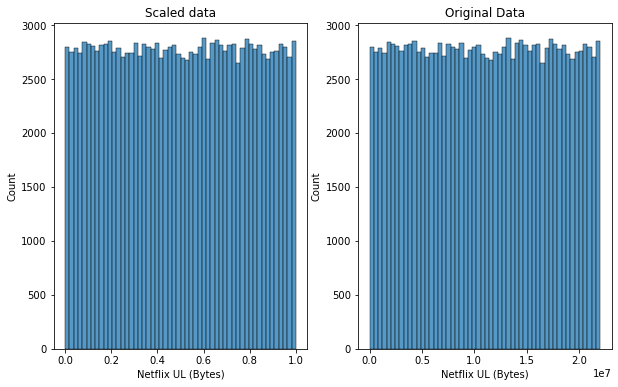

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data_scal['Netflix UL (Bytes)'],ax=ax[0])
ax[0].set_title("Scaled data")
sns.histplot(data1_clean['Netflix UL (Bytes)'], ax=ax[1])
ax[1].set_title("Original Data")

####  Normalize data
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

In [167]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

In [168]:
normalizer(data_scal)

In [169]:
data_scal.head()


,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0.938328,0.566473,21.212975,-1.212060e-01,-1.212060e-01,-0.553861,-0.373254,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.314505,-0.295072,21.212981,-0.381242,-0.373670,-0.241005,-0.447667,-1.243927,-0.659801,1.710509,-1.220922,0.628939,-1.340821,-0.509711,-0.211574,-0.590088,1.266179,-1.025292,0.115243,-0.387667,-0.597043
1,-0.915379,0.372094,15.554498,-8.008635e-02,-8.008635e-02,-0.554153,-0.377146,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.321081,-0.302659,15.554498,-0.298418,-0.293964,0.126309,-1.355529,-0.682007,-0.954999,-1.122455,-0.589083,1.283546,1.276876,0.997969,0.978911,0.765288,-1.488216,0.435039,1.423850,1.124405,0.814042
2,-1.726159,0.531763,15.513258,7.965721e-15,7.965721e-15,-0.554570,-0.380821,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.321110,-0.303426,15.513261,-0.322457,-0.326221,-0.107456,0.489081,0.841409,-0.304625,0.867337,0.761566,1.205798,0.581548,0.886357,-0.760807,-0.788876,-1.650275,-0.042795,-0.849032,-1.173923,-0.716122
3,-0.045695,-1.137816,15.016537,7.965721e-15,7.965721e-15,-0.552985,-0.373254,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.320526,-0.295267,15.016540,-0.402659,-0.374361,-1.111753,-1.028951,0.989086,0.614736,-0.339797,0.606941,1.453535,0.652003,0.352077,-1.557328,1.547310,0.535539,1.348407,0.950405,0.195366,1.603106
4,0.228030,1.580022,12.147490,7.965721e-15,7.965721e-15,-0.554570,-0.380821,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.321110,-0.303426,12.147489,-0.338191,-0.335198,-0.900761,0.908103,0.150353,-0.467245,0.139758,-1.087236,0.540238,1.253417,0.817480,-1.664683,0.433101,-0.994960,0.532921,1.183795,-0.228655,0.468971


###  another way to make it (normilize)

In [163]:


# apply normalization techniques
for column in data_scal.columns:
    data_scal[column] = (data_scal[column] -
                           data_scal[column].mean()) / data_scal[column].std()

In [164]:
display(data_scal)

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0.938328,0.566473,21.212975,-1.212060e-01,-1.212060e-01,-5.538611e-01,-3.732544e-01,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.314505,-0.295072,21.212981,-0.381242,-0.373670,-2.410054e-01,-4.476668e-01,-1.243927e+00,-6.598015e-01,1.710509e+00,-1.220922e+00,6.289390e-01,-1.340821e+00,-5.097107e-01,-2.115742e-01,-5.900884e-01,1.266179e+00,-1.025292e+00,1.152428e-01,-3.876667e-01,-0.597043
1,-0.915379,0.372094,15.554498,-8.008635e-02,-8.008635e-02,-5.541531e-01,-3.771460e-01,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.321081,-0.302659,15.554498,-0.298418,-0.293964,1.263095e-01,-1.355529e+00,-6.820074e-01,-9.549994e-01,-1.122455e+00,-5.890834e-01,1.283546e+00,1.276876e+00,9.979693e-01,9.789114e-01,7.652879e-01,-1.488216e+00,4.350391e-01,1.423850e+00,1.124405e+00,0.814042
2,-1.726159,0.531763,15.513258,7.965721e-15,7.965721e-15,-5.545702e-01,-3.808214e-01,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.321110,-0.303426,15.513261,-0.322457,-0.326221,-1.074560e-01,4.890813e-01,8.414085e-01,-3.046246e-01,8.673372e-01,7.615664e-01,1.205798e+00,5.815476e-01,8.863567e-01,-7.608074e-01,-7.888759e-01,-1.650275e+00,-4.279499e-02,-8.490319e-01,-1.173923e+00,-0.716122
3,-0.045695,-1.137816,15.016537,7.965721e-15,7.965721e-15,-5.529850e-01,-3.732544e-01,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.320526,-0.295267,15.016540,-0.402659,-0.374361,-1.111753e+00,-1.028951e+00,9.890860e-01,6.147363e-01,-3.397967e-01,6.069414e-01,1.453535e+00,6.520027e-01,3.520770e-01,-1.557328e+00,1.547310e+00,5.355394e-01,1.348407e+00,9.504047e-01,1.953657e-01,1.603106
4,0.228030,1.580022,12.147490,7.965721e-15,7.965721e-15,-5.545702e-01,-3.808214e-01,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.321110,-0.303426,12.147489,-0.338191,-0.335198,-9.007607e-01,9.081029e-01,1.503526e-01,-4.672452e-01,1.397583e-01,-1.087236e+00,5.402385e-01,1.253417e+00,8.174797e-01,-1.664683e+00,4.331009e-01,-9.949605e-01,5.329206e-01,1.183795e+00,-2.286549e-01,0.468971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,-0.166966,-0.988560,-0.288490,-1.390842e-01,-1.390842e-01,-5.526513e-01,-3.687142e-01,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.313671,-0.294398,-0.288487,-0.380150,-0.372191,1.612439e+00,1.008228e+00,1.274321e+00,6.393464e-01,-1.674091e+00,6.143793e-01,6.791666e-01,1.188286e-01,9.303566e-01,1.364324e+00,4.286021e-01,1.900201e-01,-1.718040e+00,1.095117e+00,1.463918e+00,0.489602
149997,-0.056090,-1.082279,-0.081918,-1.480232e-01,-1.480232e-01,-5.538611e-01,-3.710924e-01,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.318079,-0.299816,-0.081916,-0.393043,-0.384719,5.304255e-01,-1.331958e+00,-1.064137e+00,1.087463e-01,1.570563e-01,-1.111495e+00,3.342729e-01,-4.288329e-01,1.148408e+00,1.618273e+00,8.396543e-01,-7.429622e-01,1.196850e+00,-1.217663e+00,-1.761319e-01,0.868371
149998,-0.749065,1.080190,-0.078475,-1.194182e-01,-1.194182e-01,-5.530268e-01,-3.726058e-01,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.

#### Exemple

Text(0.5, 1.0, 'Original Data')

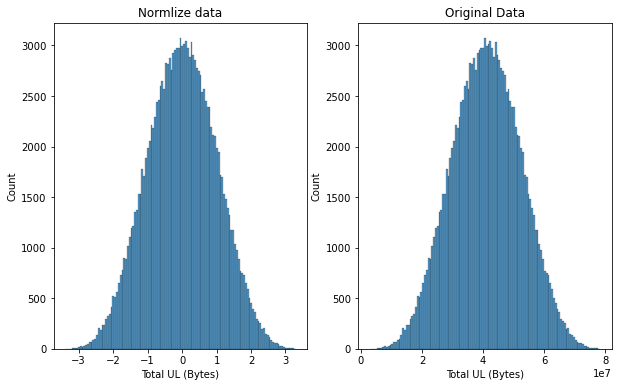

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data_scal['Total UL (Bytes)'],ax=ax[0])
ax[0].set_title("Normlize data")
sns.histplot(data1_clean['Total UL (Bytes)'], ax=ax[1])
ax[1].set_title("Original Data")

In [179]:

data_clean3 = pd.concat((data_scal, data1_clean[['Start','Last Location Name', 'Handset Manufacturer', 'Handset Type','End', 'Bearer Id','MSISDN/Number','IMEI', 'IMSI']]), 1)
data_clean3.head()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Start,Last Location Name,Handset Manufacturer,Handset Type,End,Bearer Id,MSISDN/Number,IMEI,IMSI
0,0.938328,0.566473,21.212975,-1.212060e-01,-1.212060e-01,-0.553861,-0.373254,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.314505,-0.295072,21.212981,-0.381242,-0.373670,-0.241005,-0.447667,-1.243927,-0.659801,1.710509,-1.220922,0.628939,-1.340821,-0.509711,-0.211574,-0.590088,1.266179,-1.025292,0.115243,-0.387667,-0.597043,4/4/2019 12:01,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F,4/25/2019 14:35,1.311448e+19,3.366496e+10,3.552121e+13,2.082014e+14
1,-0.915379,0.372094,15.554498,-8.008635e-02,-8.008635e-02,-0.554153,-0.377146,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.321081,-0.302659,15.554498,-0.298418,-0.293964,0.126309,-1.355529,-0.682007,-0.954999,-1.122455,-0.589083,1.283546,1.276876,0.997969,0.978911,0.765288,-1.488216,0.435039,1.423850,1.124405,0.814042,4/9/2019 13:04,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),4/25/2019 8:15,1.311448e+19,3.368185e+10,3.579401e+13,2.082019e+14
2,-1.726159,0.531763,15.513258,7.965721e-15,7.965721e-15,-0.554570,-0.380821,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.321110,-0.303426,15.513261,-0.322457,-0.326221,-0.107456,0.489081,0.841409,-0.304625,0.867337,0.761566,1.205798,0.581548,0.886357,-0.760807,-0.788876,-1.650275,-0.042795,-0.849032,-1.173923,-0.716122,4/9/2019 17:42,D42335A,Samsung,Samsung Galaxy A8 (2018),4/25/2019 11:58,1.311448e+19,3.376063e+10,3.528151e+13,2.082003e+14
3,-0.045695,-1.137816,15.016537,7.965721e-15,7.965721e-15,-0.552985,-0.373254,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.320526,-0.295267,15.016540,-0.402659,-0.374361,-1.111753,-1.028951,0.989086,0.614736,-0.339797,0.606941,1.453535,0.652003,0.352077,-1.557328,1.547310,0.535539,1.348407,0.950405,0.195366,1.603106,4/10/2019 0:31,T21824A,undefined,undefined,4/25/2019 7:36,1.311448e+19,3.375034e+10,3.535661e+13,2.082014e+14
4,0.228030,1.580022,12.147490,7.965721e-15,7.965721e-15,-0.554570,-0.380821,0.547003,-0.4923,-0.411653,-0.332407,0.316248,-0.240166,-0.090853,-0.060764,-0.321110,-0.303426,12.147489,-0.338191,-0.335198,-0.900761,0.908103,0.150353,-0.467245,0.139758,-1.087236,0.540238,1.253417,0.817480,-1.664683,0.433101,-0.994960,0.532921,1.183795,-0.228655,0.468971,4/12/2019 20:10,D88865A,Samsung,Samsung Sm-G390F,4/25/2019 10:40,1.311448e+19,3.369980e+10,3.540701e+13,2.082014e+14


#### Extracting Data

In [178]:
!mkdir "csv"
data1_clean.to_csv('csv/data1_clean.csv', index=False)


In [182]:
data_clean3.to_csv('csv/data_clean3.csv', index=False)



 ## Importation of the dataset 

In [163]:
import os
os.chdir("C:/Users/hp/Documents/csv")

import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)


data1 = pd.read_csv("data1_clean.csv", na_values=['?', None])


### Let's aggregate per user  :
#### .number of xDR sessions
#### .Session duration
#### .the total download (DL) and upload (UL) data
#### .the total data volume (in Bytes) during this session for each application


In [166]:
data2 = data1.groupby('Bearer Id')[['Bearer Id','Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)',
 'Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)',
 'Gaming DL (Bytes)','Gaming UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)','Dur. (ms)']].sum()

In [167]:
data2.shape

(134708, 16)

In [168]:
data2.head()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms)
Bearer Id,,,,,,,,,,,,,,,,
6.917538e+18,6.917538e+18,2404741.0,2410.0,5791591.0,2871336.0,782388.0,806920.0,6139644.0,2071526.0,19494278.0,14668354.0,466109357.0,5333340.0,41704610.0,500721999.0,24534.0
6.917538e+18,6.917538e+18,2478607.0,11936.0,3605446.0,2825198.0,446376.0,525108.0,10281221.0,18119976.0,19455048.0,10631652.0,673282567.0,2670856.0,38693596.0,709549265.0,21489.0
6.917538e+18,6.917538e+18,944612.0,2827.0,10373157.0,56392.0,128003.0,34038.0,5385159.0,4295851.0,15755839.0,1300571.0,821879090.0,8521398.0,15548926.0,854465860.0,27786.0
6.917538e+18,6.917538e+18,1817239.0,19827.0,269988.0,3696393.0,3191192.0,896670.0,12347020.0,11089528.0,2859358.0,1738176.0,805301713.0,16257481.0,49605688.0,825786510.0,15635.0
6.917538e+18,6.917538e+18,1867318.0,18928.0,1689296.0,195216.0,740633.0,590043.0,15231815.0,8401567.0,21563985.0,2817981.0,583864716.0,6992868.0,21983463.0,624957763.0,24264.0


## Description of all  relevant variables and  data types

### Description 
In telecommunication, CDR or Call Detail Record is the voice channel and XDR is the data channel equivalent. So here,we consider xDR as data sessions Detail Record. In xDR, user behavior can be tracked through the following applications:  Social Media, Google, Email, Youtube, Netflix, Gaming, Other .  The used variables   are coded as below :


##### Bearer Id : xDr session identifier
##### Social Media DL (Bytes) : Social Media data volume (in Bytes) received by the MS during this session 
##### Social Media UL (Bytes) : Social Media data volume (in Bytes) sent by the MS during this session
##### YouTube DL (Bytes)	YouTube data volume (in Bytes) received by the MS during this session
##### YouTube UL (Bytes)	YouTube data volume (in Bytes) sent by the MS during this session
##### Netflix DL (Bytes)	Netflix data volume (in Bytes) received by the MS during this session
##### Netflix UL (Bytes)	Netflix data volume (in Bytes) sent by the MS during this session
##### Google DL (Bytes)	Google data volume (in Bytes) Received by the MS during this session
##### Google UL (Bytes)	Google data volume (in Bytes) sent by the MS during this session
##### Email DL (Bytes)	Email data volume (in Bytes) Received by the MS during this session
##### Email UL (Bytes)	Email data volume (in Bytes) sent by the MS during this session
##### Gaming DL (Bytes)	Gaming data volume (in Bytes) Received by the MS during this session
##### Gaming UL (Bytes)	Gaming data volume (in Bytes) sent by the MS during this session
##### Total DL (Bytes)	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)
##### Total UL (Bytes)	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)


In [32]:
data2.dtypes

Bearer Id                  float64
Social Media DL (Bytes)    float64
Social Media UL (Bytes)    float64
Google DL (Bytes)          float64
Google UL (Bytes)          float64
Email DL (Bytes)           float64
Email UL (Bytes)           float64
Youtube DL (Bytes)         float64
Youtube UL (Bytes)         float64
Netflix DL (Bytes)         float64
Netflix UL (Bytes)         float64
Gaming DL (Bytes)          float64
Gaming UL (Bytes)          float64
Total UL (Bytes)           float64
Total DL (Bytes)           float64
Dur. (ms)                  float64
dtype: object

In [33]:


data3= data2.drop(['Bearer Id'],axis=1)
data3.describe()

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms)
count,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05,1.347080e+05
mean,1.999139e+06,3.666670e+04,6.403619e+06,2.290015e+06,1.995139e+06,5.204330e+05,1.295485e+07,1.225928e+07,1.294681e+07,1.225075e+07,4.699582e+08,9.229355e+06,4.578957e+07,5.062571e+08,1.164843e+05
std,5.121697e+06,9.416558e+04,1.602331e+07,5.843980e+06,5.131526e+06,1.304397e+06,3.337573e+07,3.110356e+07,3.318892e+07,3.092913e+07,1.174754e+09,2.281178e+07,1.140494e+08,1.263251e+09,1.723327e+05
min,1.200000e+01,0.000000e+00,2.070000e+02,3.000000e+00,1.400000e+01,2.000000e+00,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,2.866892e+06,8.827082e+06,7.142000e+03
25%,9.744755e+05,1.780200e+04,3.121038e+06,1.112488e+06,9.665088e+05,2.533670e+05,6.323295e+06,5.977416e+06,6.278258e+06,5.947367e+06,2.280148e+08,4.486302e+06,3.407356e+07,2.614752e+08,6.008050e+04
50%,1.926058e+06,3.536600e+04,6.173364e+06,2.205382e+06,1.922530e+06,4.998425e+05,1.245975e+07,1.181299e+07,1.245038e+07,1.181090e+07,4.538387e+08,8.888646e+06,4.252723e+07,4.877182e+08,8.640000e+04
75%,2.857805e+06,5.234200e+04,9.136172e+06,3.277639e+06,2.853171e+06,7.430518e+05,1.851227e+07,1.749430e+07,1.851040e+07,1.750096e+07,6.721896e+08,1.316816e+07,5.176999e+07,7.064602e+08,1.530890e+05
max,1.821314e+09,3.349146e+07,5.689145e+09,2.077476e+09,1.825288e+09,4.630606e+08,1.187357e+10,1.105373e+10,1.180302e+10,1.098732e+10,4.170317e+11,8.093224e+09,4.127512e+10,4.499613e+11,5.168786e+07


>The output below showed us, the statistic descritive of each variables. Here we can notice that the size of each variables are the same. On average ,we can also notice that people are likely more to download gaming (4.699582e+08)  more than  other activity applications. That also means that people like more used money on downloaded gaming application  than  other applications. On the other side , people are more likely also to upload  video on youtube than other activity applications such as Social Media, Google etc..... .  The minimum of Bytes consommation  among all aplication  is 0  and it is on the Social media application. Downloard Gaming application  pushed people to used more  Byte than other. In the field of Telecomunication, the maximum consommation is appeared on Gaming Application.\
On average , the total UL on bytes upload
is less than Total download in bytes . It’s
also means that on average people
download things more that they upload.\
25%  of Data volume (in Bytes) received by the MS during this session (IP layer + overhead)  is less than 	2.614752e+08 ,  the 50th percentile shows that 50% of the Total DL (Bytes) are less than 4.877182e+08 (bytes) , and 50% of the scores are above 4.877182e+08 (bytes).\
25%  of Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)  is less than 	3.407356e+07(Bytes) ,  the 50th percentile shows that 50% of the Total UL (Bytes) are less than 4.252723e+07(bytes) , and 50% of the scores are above 4.252723e+07	 (bytes).

### let compute the total number of bytes for each application

In [60]:
total_Social_media = data2['Social Media DL (Bytes)'] + data2['Social Media UL (Bytes)']
total_Google = data2['Google DL (Bytes)']+data2['Google UL (Bytes)']
total_Email = data2['Email DL (Bytes)']+data2['Email UL (Bytes)']
total_Youtube = data2['Youtube DL (Bytes)']+data2['Youtube UL (Bytes)']
total_Netflix = data2['Netflix DL (Bytes)']+data2['Netflix DL (Bytes)']
total_Gaming = data2['Gaming DL (Bytes)']+data2['Gaming UL (Bytes)']

#let add it on the dataframe
data2['total_Social_media']= total_Social_media
data2['total_Google']=total_Google
data2['total_Email']=total_Email
data2['total_Youtube']=total_Youtube
data2['total_Netflix']=total_Netflix
data2['total_Gaming']=total_Gaming

data2.head()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming
Bearer Id,,,,,,,,,,,,,,,,,,,,,,
6.917538e+18,6.917538e+18,2404741.0,2410.0,5791591.0,2871336.0,782388.0,806920.0,6139644.0,2071526.0,19494278.0,14668354.0,466109357.0,5333340.0,41704610.0,500721999.0,24534.0,2407151.0,8662927.0,1589308.0,8211170.0,38988556.0,471442697.0
6.917538e+18,6.917538e+18,2478607.0,11936.0,3605446.0,2825198.0,446376.0,525108.0,10281221.0,18119976.0,19455048.0,10631652.0,673282567.0,2670856.0,38693596.0,709549265.0,21489.0,2490543.0,6430644.0,971484.0,28401197.0,38910096.0,675953423.0
6.917538e+18,6.917538e+18,944612.0,2827.0,10373157.0,56392.0,128003.0,34038.0,5385159.0,4295851.0,15755839.0,1300571.0,821879090.0,8521398.0,15548926.0,854465860.0,27786.0,947439.0,10429549.0,162041.0,9681010.0,31511678.0,830400488.0
6.917538e+18,6.917538e+18,1817239.0,19827.0,269988.0,3696393.0,3191192.0,896670.0,12347020.0,11089528.0,2859358.0,1738176.0,805301713.0,16257481.0,49605688.0,825786510.0,15635.0,1837066.0,3966381.0,4087862.0,23436548.0,5718716.0,821559194.0
6.917538e+18,6.917538e+18,1867318.0,18928.0,1689296.0,195216.0,740633.0,590043.0,15231815.0,8401567.0,21563985.0,2817981.0,583864716.0,6992868.0,21983463.0,624957763.0,24264.0,1886246.0,1884512.0,1330676.0,23633382.0,43127970.0,590857584.0


### Graphical Univariate Analysis

#### Let's import the  dataset already scaled and normalised 


In [169]:
import os
os.chdir("C:/Users/hp/Documents/csv")

import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)



data3 = pd.read_csv("data_clean3.csv", na_values=['?', None])





In [217]:
data3.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Bearer Id', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)',
       'Dur. (ms)', 'total_Social_media', 'total_Google', 'total_Email',
       'total_Youtube', 'total_Netflix', 'total_Gaming', 'DL+UL ',
       'DecileRank'],
      dtype='object')>

In [170]:
data3 = data3.groupby('Bearer Id')[['Bearer Id','Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)',
 'Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)',
 'Gaming DL (Bytes)','Gaming UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)','Dur. (ms)']].sum()


In [171]:
data3.shape

(134708, 16)

In [172]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
    

<Figure size 648x504 with 0 Axes>

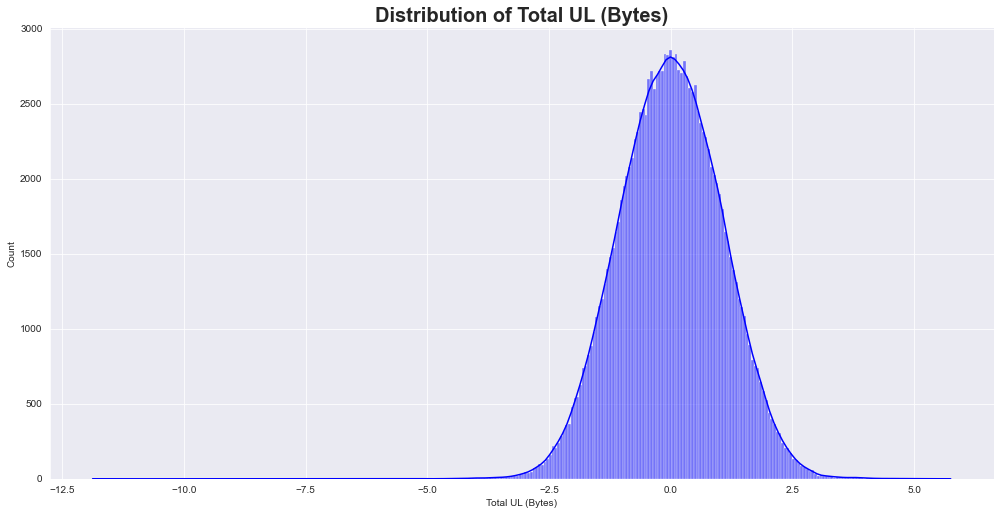

In [173]:

    
    
#plot_hist(quntitative_df, 'netflix', color='red')
plot_hist(data3, "Total UL (Bytes)", "blue")

<Figure size 648x504 with 0 Axes>

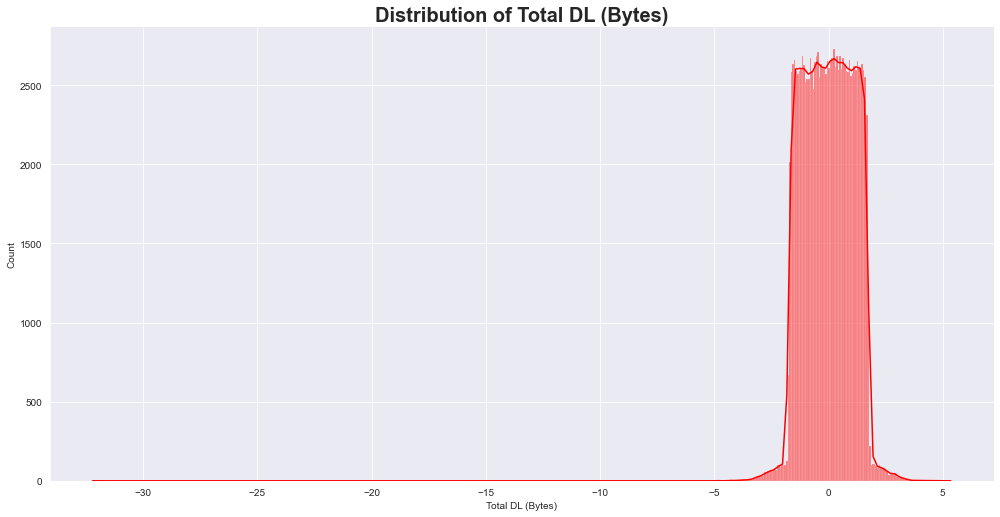

In [174]:
plot_hist(data3, "Total DL (Bytes)", "red")

> The total
UL(bytes)
shape
distribution
are very
closed to the
shape of
bell, which
mean some
kind of
normality. The first look of the shape of the distribution of the variable Total DL allowed us to say that ,
the distribution are stable , nor skewed, not normal distributed .We notice the same shape
whatever we move to at most 1 to 8 and above . There is no variation .\
With the shape of
the distribtion of the
Dur(ms) variable plotted below , It
will be difficult to
argue , But we can
say that, there are an
extreme value , on
the range of 0.0 to
0.4 .

<Figure size 648x504 with 0 Axes>

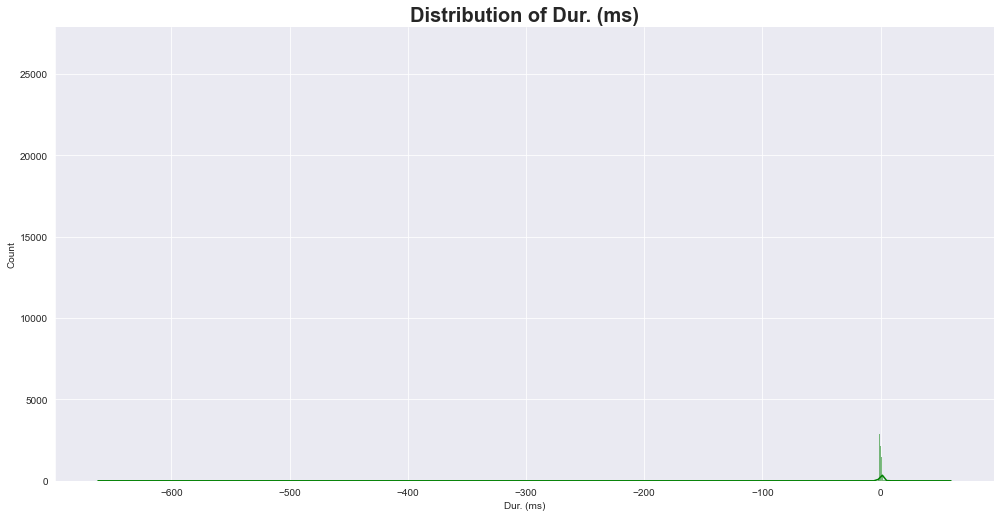

In [175]:
plot_hist(data3, "Dur. (ms)", "green")

> The shape of the distribution of the variable Social Media DL (Bytes) allowed us to say that , the distribution are stable , nor skewed, not normal distributed .We notice the same shape whatever we move to theminimum to the maximum. There is no variation . We can notice pratically the same things  for other single variables. 

<Figure size 648x504 with 0 Axes>

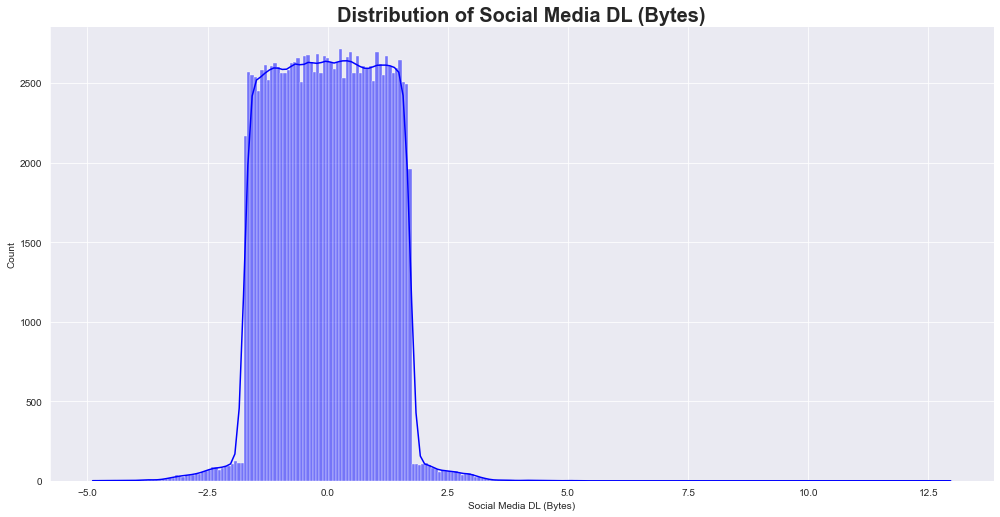

<Figure size 648x504 with 0 Axes>

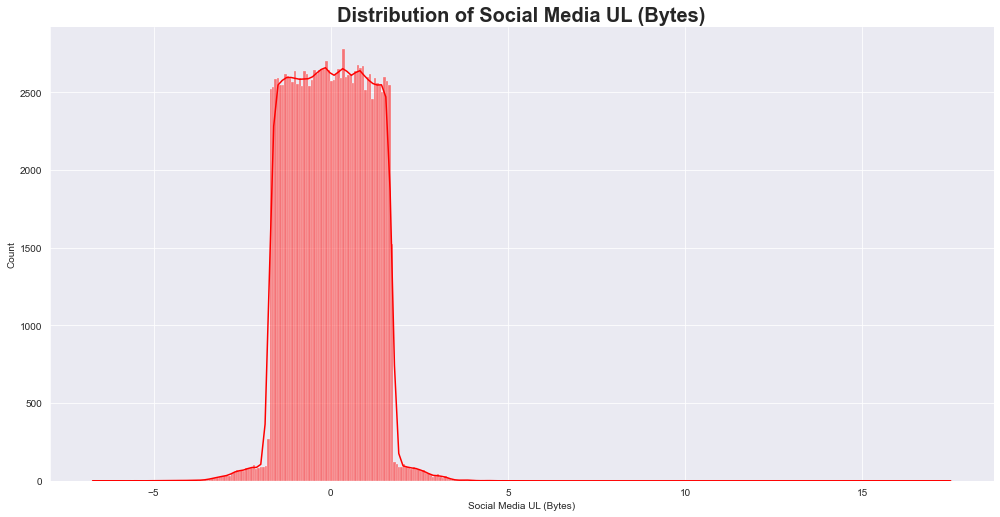

In [148]:

plot_hist(data3, "Social Media DL (Bytes)", "blue")
plot_hist(data3, "Social Media UL (Bytes)", "red")

<Figure size 648x504 with 0 Axes>

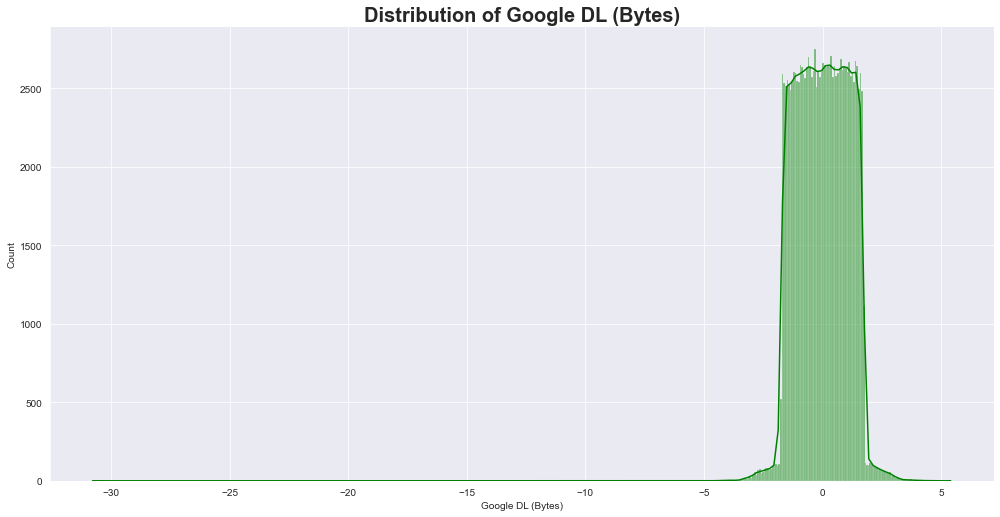

<Figure size 648x504 with 0 Axes>

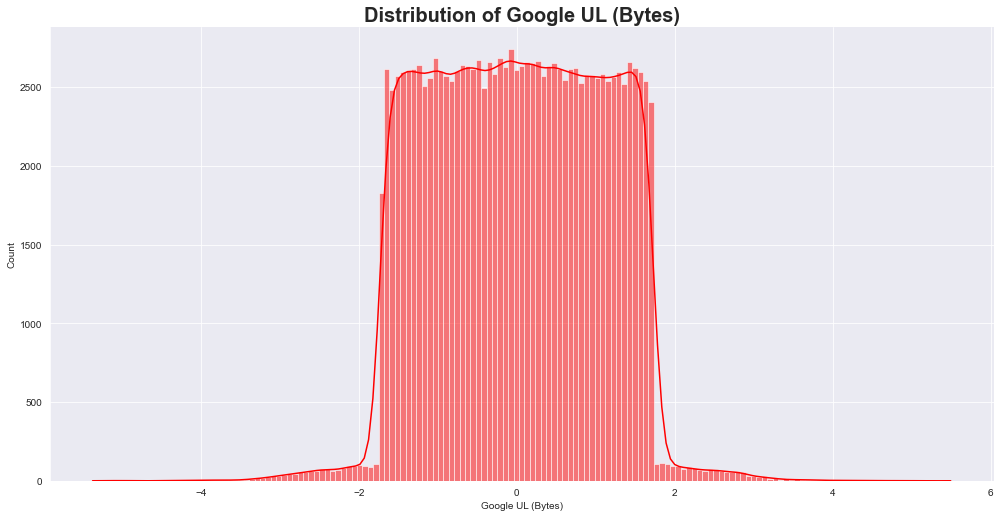

In [176]:

plot_hist(data3, "Google DL (Bytes)", "green")
plot_hist(data3, "Google UL (Bytes)", "red")

<Figure size 648x504 with 0 Axes>

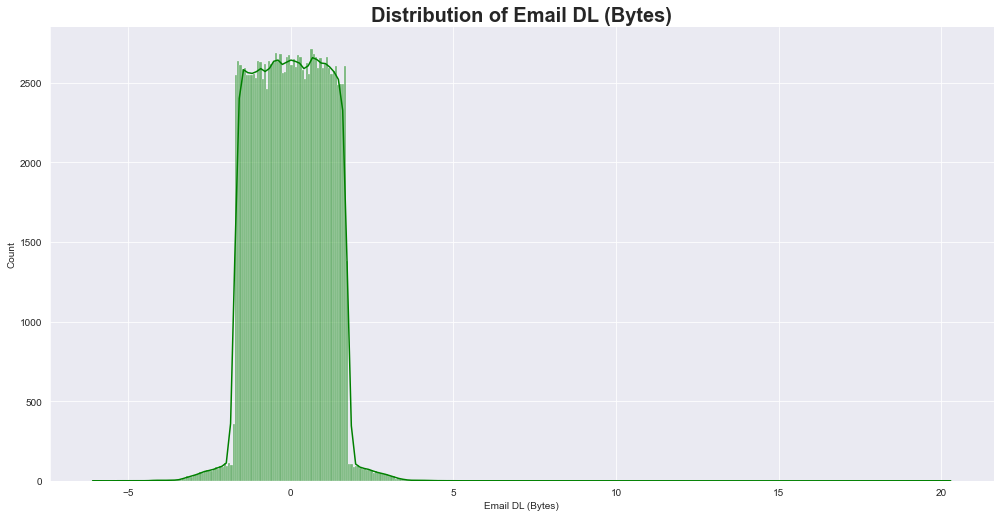

<Figure size 648x504 with 0 Axes>

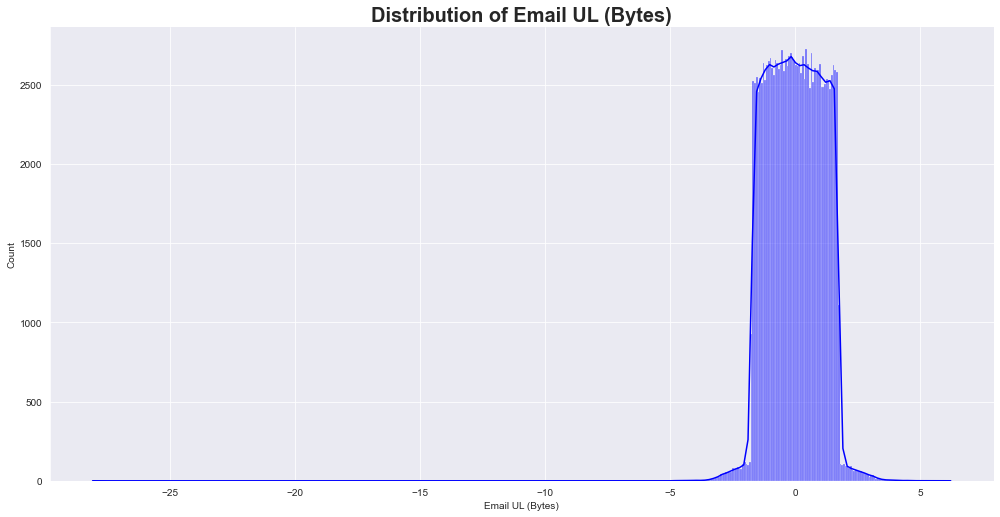

In [177]:
plot_hist(data3, "Email DL (Bytes)", "green")
plot_hist(data3, "Email UL (Bytes)", "blue")

<Figure size 648x504 with 0 Axes>

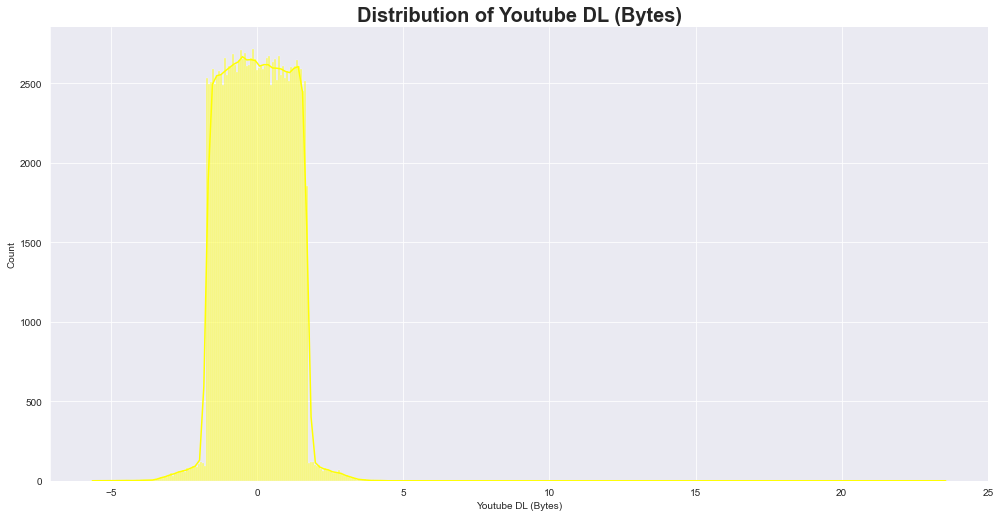

<Figure size 648x504 with 0 Axes>

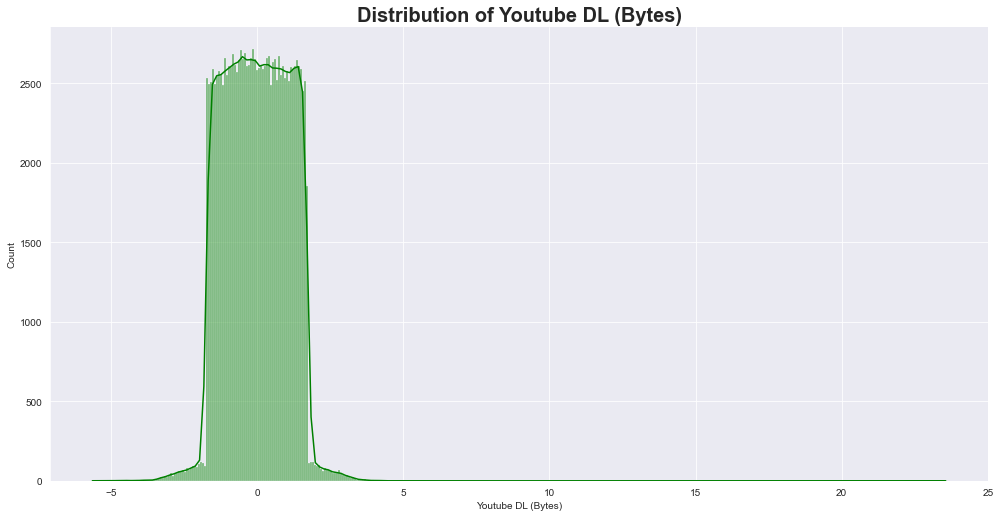

In [178]:
plot_hist(data3, "Youtube DL (Bytes)", "yellow")
plot_hist(data3, "Youtube DL (Bytes)", "green")

<Figure size 648x504 with 0 Axes>

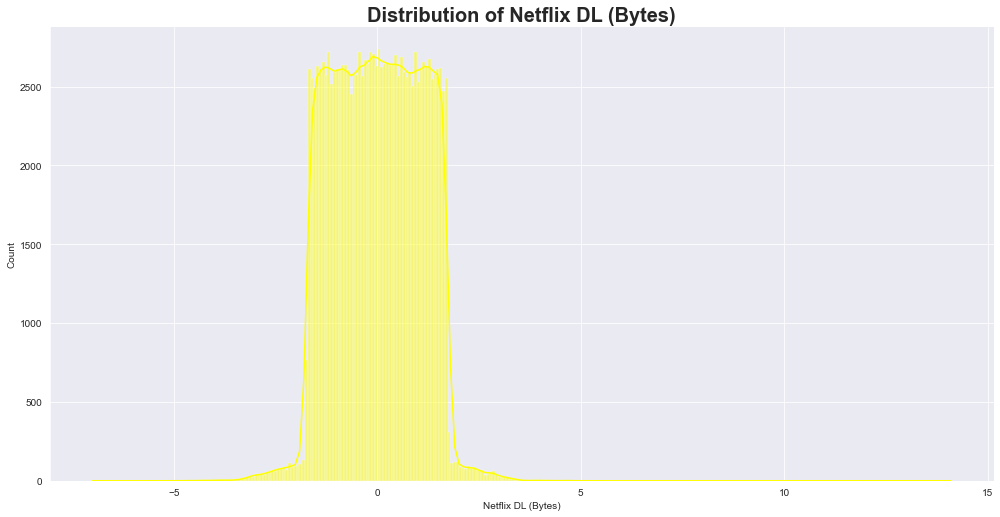

<Figure size 648x504 with 0 Axes>

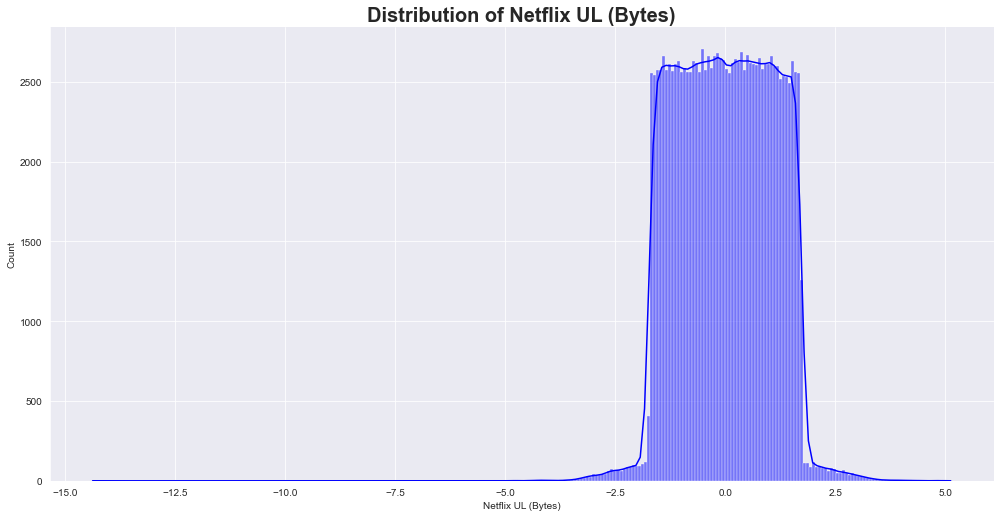

In [179]:

plot_hist(data3, "Netflix DL (Bytes)", "yellow")
plot_hist(data3, "Netflix UL (Bytes)", "blue")

<Figure size 648x504 with 0 Axes>

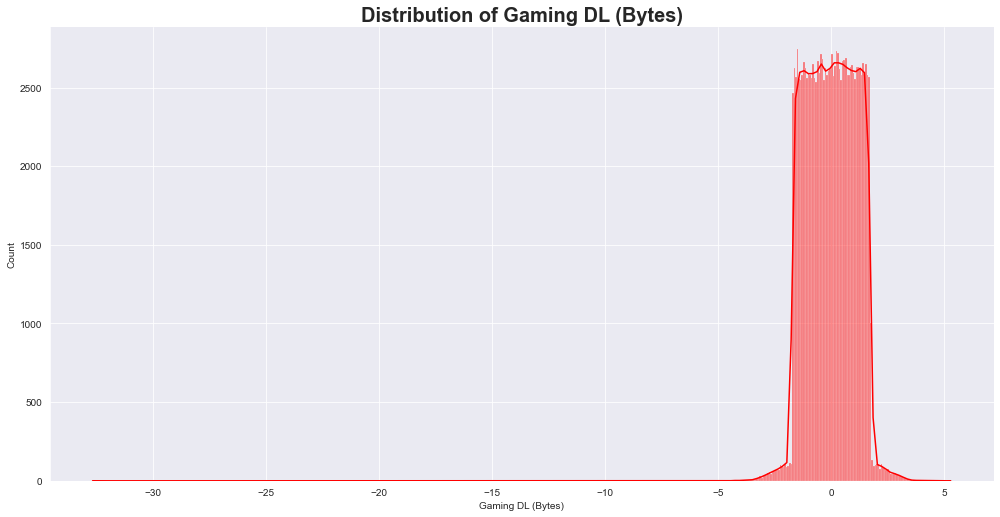

<Figure size 648x504 with 0 Axes>

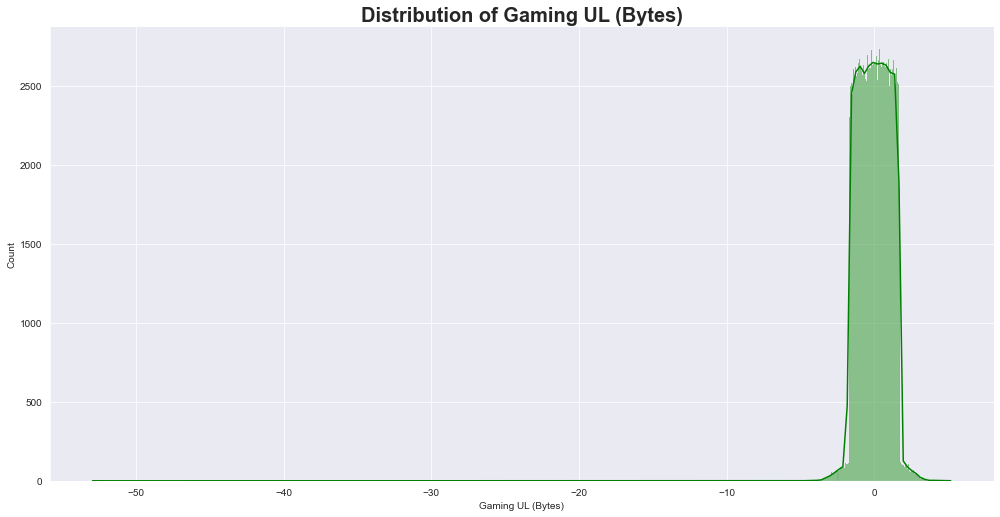

In [180]:

plot_hist(data3, "Gaming DL (Bytes)", "red")
plot_hist(data3, "Gaming UL (Bytes)", "green")

### Let compute total of consommation of each application

In [181]:
total_Social_media = data3['Social Media DL (Bytes)'] + data3['Social Media UL (Bytes)']
total_Google = data3['Google DL (Bytes)']+data3['Google UL (Bytes)']
total_Email = data3['Email DL (Bytes)']+data3['Email UL (Bytes)']
total_Youtube = data3['Youtube DL (Bytes)']+data3['Youtube UL (Bytes)']
total_Netflix = data3['Netflix DL (Bytes)']+data3['Netflix DL (Bytes)']
total_Gaming = data3['Gaming DL (Bytes)']+data3['Gaming UL (Bytes)']

#let add it on the dataframe
data3['total_Social_media']= total_Social_media
data3['total_Google']=total_Google
data3['total_Email']=total_Email
data3['total_Youtube']=total_Youtube
data3['total_Netflix']=total_Netflix
data3['total_Gaming']=total_Gaming


Text(0.5, 1.0, 'total_Email')

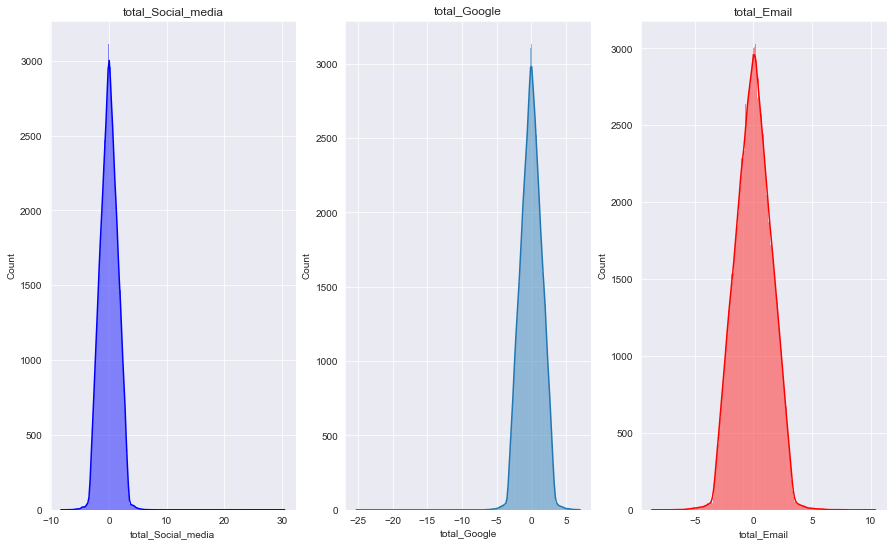

In [182]:
#plot
fig, ax = plt.subplots(1,3, figsize=(15, 9))
sns.set_style('darkgrid')
sns.histplot(data3['total_Social_media'],color="blue",kde=True,ax=ax[0])
ax[0].set_title("total_Social_media")
sns.histplot(data3['total_Google'],kde=True,ax=ax[1])
ax[1].set_title("total_Google")
sns.histplot(data3['total_Email'],color="red",kde=True,ax=ax[2])
ax[2].set_title("total_Email")

> Here  variables such as total_Social_media, total_Google, total_Email,total_Youtube, total_Gaming,total_Netflix  are seems to have a leptokurtic distribution and about total_Netflix, there is no variables arround the mean.

Text(0.5, 1.0, 'total_Netflix')

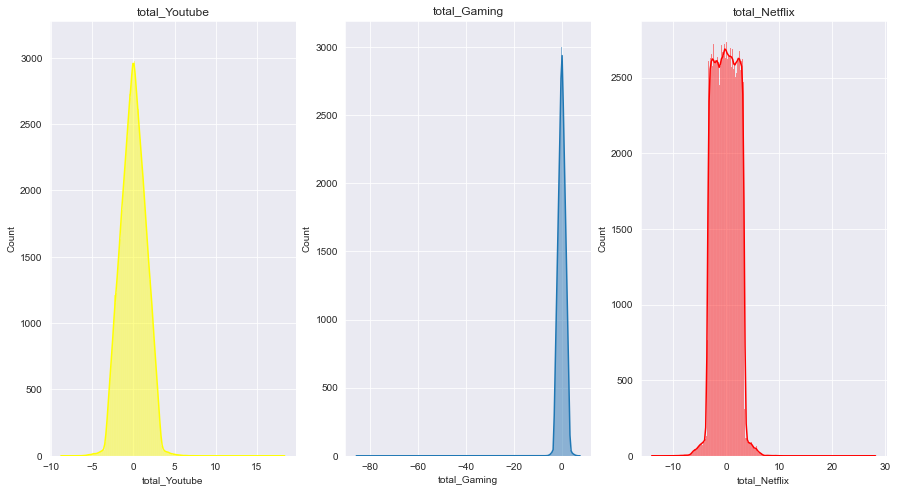

In [183]:
fig, ax = plt.subplots(1,3, figsize=(15, 8))
sns.set_style('darkgrid')
sns.histplot(data3['total_Youtube'],color='yellow',kde=True,ax=ax[0])
ax[0].set_title("total_Youtube")
sns.histplot(data3['total_Gaming'],ax=ax[1],kde=True)
ax[1].set_title("total_Gaming")
sns.histplot(data3['total_Netflix'],color='red',kde=True,ax=ax[2])
ax[2].set_title("total_Netflix")

### Bivariate Analysis

#### Let's compute a  sum of DLand UL  and make a good bivariate plot 

In [186]:
data3['DL+UL ']= data3['Total UL (Bytes)']+data3['Total UL (Bytes)']
data3.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Bearer Id', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)',
       'Dur. (ms)', 'total_Social_media', 'total_Google', 'total_Email',
       'total_Youtube', 'total_Netflix', 'total_Gaming', 'DL+UL '],
      dtype='object')>

In [187]:
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()



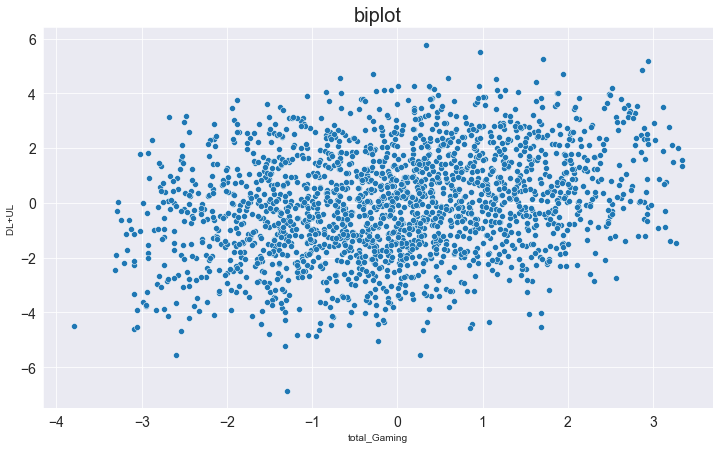

In [195]:
plot_scatter(data3.head(2000), x_col="total_Gaming", y_col="DL+UL ", title="biplot")

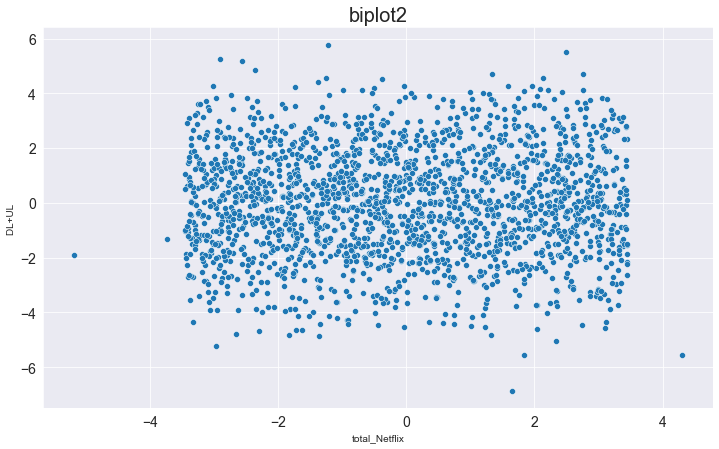

In [196]:
plot_scatter(data3.head(2000), x_col="total_Netflix", y_col="DL+UL ", title="biplot2")

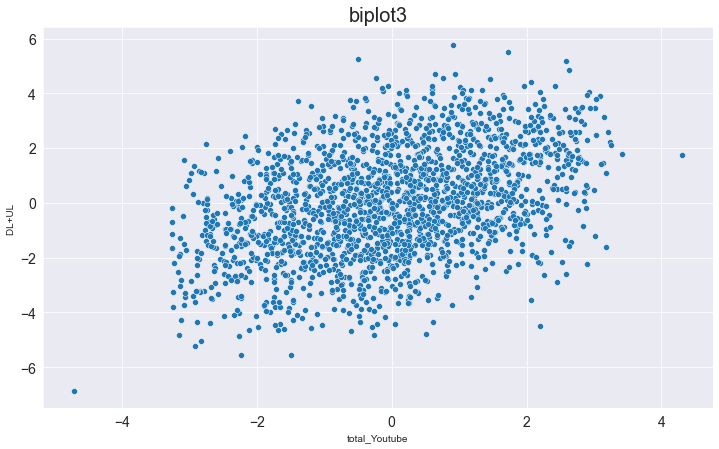

In [197]:
plot_scatter(data3.head(2000), x_col="total_Youtube", y_col="DL+UL ", title="biplot3")

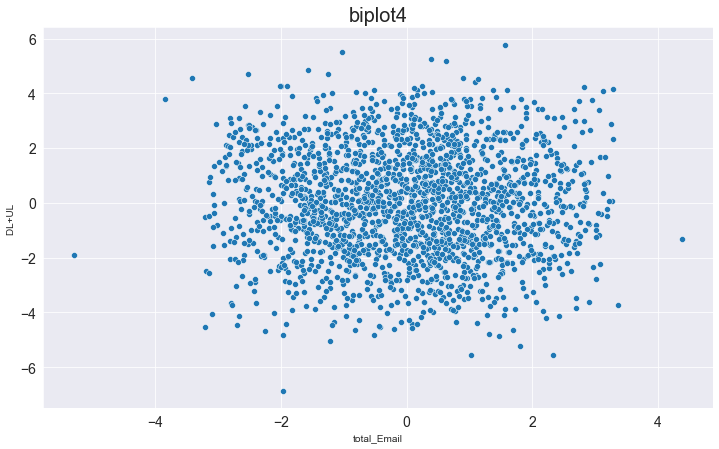

In [198]:
plot_scatter(data3.head(2000), x_col="total_Email", y_col="DL+UL ", title="biplot4")

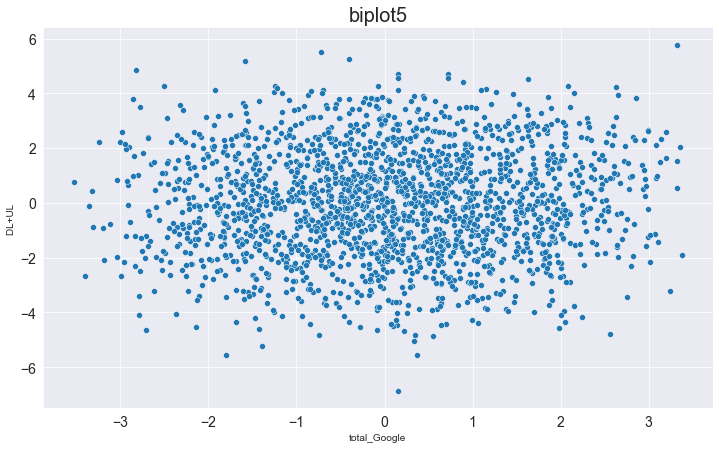

In [200]:
plot_scatter(data3.head(2000), x_col="total_Google", y_col="DL+UL ", title="biplot5")

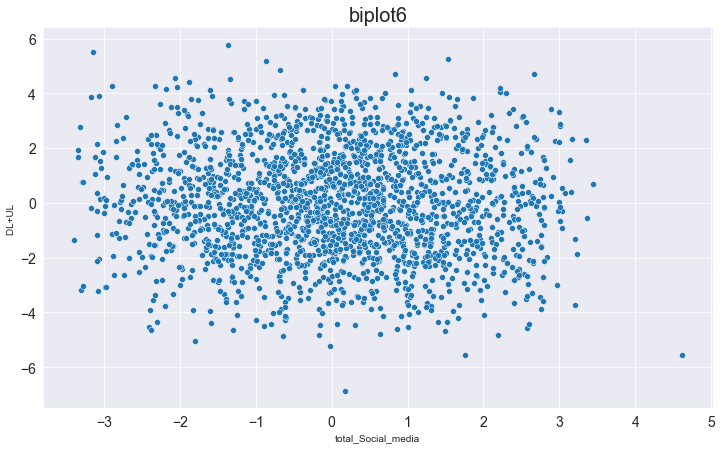

In [202]:
plot_scatter(data3.head(2000), x_col="total_Social_media", y_col="DL+UL ", title="biplot6")

### Variable Transformation 

In [203]:
## segmentation 
# Sorting the DataFrame in Ascending Order of total  Duration
data3.sort_values(by =['Dur. (ms)'], inplace = True)

######### let's segment the users into top five decile classes based on the total duration for all 
#sessions and compute the total data (DL+UL) per decile class
data3['DecileRank']= pd.qcut(data3['Dur. (ms)'], 
                           q = 5, labels = False)

data3['DecileRank'].value_counts()

######################## 0, 1,2,3,4 are the different top five deciles 
rslt_0 = data3[data3['DecileRank'] ==0]
rslt_1 = data3[data3['DecileRank'] == 1]
rslt_2 = data3[data3['DecileRank'] == 2]
rslt_3 = data3[data3['DecileRank'] == 3]
rslt_4 = data3[data3['DecileRank'] == 4]


In [209]:
rslt_0.head()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,,,,,,,,,,,,,,,,,,,,,,,,
1.304243e+19,1.313372e+22,12.965165,17.495838,-30.782562,5.494550,20.289833,-28.093711,23.553705,-5.160160,14.093179,-14.379322,-32.657441,-52.939332,-11.877362,-32.211266,-662.075266,30.461003,-25.288012,-7.803878,18.393545,28.186357,-85.596773,-23.754723,0
7.349883e+18,4.409930e+19,1.498880,1.664322,-5.814547,-5.139695,0.420896,-0.896878,1.858555,-3.502377,-2.132171,5.120418,0.177414,-2.547020,-1.110696,0.098984,-6.303890,3.163201,-10.954243,-0.475982,-1.643823,-4.264343,-2.369606,-2.221392,0
1.304243e+19,1.173818e+20,2.808065,-2.262154,-2.962957,0.421898,-2.521676,0.638876,1.877207,-2.295645,-7.001316,2.172588,-3.746766,4.218543,-1.093259,-3.924277,-6.214009,0.545910,-2.541059,-1.882800,-0.418439,-14.002632,0.471777,-2.186517,0
1.304243e+19,6.521213e+19,-0.542639,-2.529397,-3.874012,3.006846,-0.645337,5.521186,-0.589066,0.485489,3.520124,1.495756,-0.833656,-2.241318,1.517211,-0.809820,-5.625111,-3.072036,-0.867166,4.875849,-0.103578,7.040247,-3.074973,3.034422,0
1.304243e+19,6.521213e+19,-4.595041,2.669281,-2.408295,-0.298542,-0.033538,2.150988,3.753130,3.921948,-1.251921,1.781619,-2.780919,-1.758836,2.994615,-2.762518,-5.251123,-1.925760,-2.706837,2.117450,7.675078,-2.503841,-4.539755,5.989229,0


In [211]:
rslt_1.head()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,,,,,,,,,,,,,,,,,,,,,,,,
7.349883e+18,1.469977e+19,-1.345615,-0.176252,2.198410,-0.720655,0.060970,-1.708872,-0.582097,-0.595388,0.807025,-1.603375,0.387677,-2.664482,-2.113525,0.417984,-0.737239,-1.521867,1.477755,-1.647901,-1.177485,1.614050,-2.276804,-4.227049,1
7.349883e+18,7.349883e+18,-1.570797,0.671496,0.862647,-1.407296,1.681340,0.664444,-0.078237,0.319639,1.106420,-1.273949,1.324260,1.224077,0.184928,1.363806,-0.737209,-0.899302,-0.544649,2.345784,0.241402,2.212839,2.548337,0.369856,1
7.349883e+18,7.349883e+18,1.089143,0.965979,-1.581798,1.164741,1.218137,0.732296,-0.318056,0.124451,-1.017254,-0.792064,-0.999802,-0.244300,-0.708722,-1.047500,-0.737196,2.055122,-0.417057,1.950433,-0.193604,-2.034508,-1.244101,-1.417444,1
1.311448e+19,1.311448e+19,1.490056,-1.212892,-1.361750,-0.235848,-0.983917,0.823836,-0.350354,1.043867,-0.481077,0.505222,1.074890,0.247667,0.526141,1.034930,-0.737184,0.277164,-1.597598,-0.160080,0.693513,-0.962153,1.322557,1.052282,1
7.277826e+18,7.277826e+18,-0.620458,1.337542,-1.319265,0.644061,-0.129128,0.483420,-0.246122,-0.600206,0.683577,1.167489,-0.221095,1.390015,1.149678,-0.229930,-0.737184,0.717085,-0.675204,0.354292,-0.846327,1.367154,1.168920,2.299357,1


In [212]:
rslt_2.head()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,,,,,,,,,,,,,,,,,,,,,,,,
6.917538e+18,6.917538e+18,0.671620,1.075312,-1.234334,-1.429986,-0.574087,0.923000,0.544117,0.471209,-1.099089,-0.653608,1.703845,-1.199265,-1.028534,1.670991,-0.224754,1.746931,-2.664321,0.348913,1.015326,-2.198178,0.504580,-2.057068,2
7.277826e+18,7.277826e+18,0.803911,1.585356,1.496835,0.499221,-0.317760,1.517589,-1.215074,1.513210,-1.011202,-1.148786,-0.886191,0.654161,0.608976,-0.924458,-0.224754,2.389267,1.996057,1.199829,0.298136,-2.022404,-0.232030,1.217952,2
6.917538e+18,6.917538e+18,1.262493,-0.962236,-0.290592,-0.744076,1.241396,0.341141,0.354460,0.091782,-1.420922,1.565303,1.378036,1.032801,1.397232,1.354336,-0.224754,0.300257,-1.034669,1.582537,0.446242,-2.841844,2.410836,2.794464,2
6.917538e+18,6.917538e+18,-0.152084,0.490870,-0.348745,-1.663736,-0.167474,1.485212,-0.396852,1.176336,-0.499487,0.684858,1.142679,-0.067185,0.387320,1.111114,-0.224754,0.338787,-2.012482,1.317738,0.779484,-0.998973,1.075494,0.774639,2
1.311448e+19,1.311448e+19,-0.685030,-1.017113,0.874396,0.339740,1.272422,1.543659,1.271373,1.680095,-0.775278,0.467693,-1.715313,1.127718,1.666428,-1.686150,-0.224754,-1.702144,1.214136,2.816081,2.951468,-1.550556,-0.587595,3.332857,2


In [213]:
rslt_2.head()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,,,,,,,,,,,,,,,,,,,,,,,,
6.917538e+18,6.917538e+18,0.671620,1.075312,-1.234334,-1.429986,-0.574087,0.923000,0.544117,0.471209,-1.099089,-0.653608,1.703845,-1.199265,-1.028534,1.670991,-0.224754,1.746931,-2.664321,0.348913,1.015326,-2.198178,0.504580,-2.057068,2
7.277826e+18,7.277826e+18,0.803911,1.585356,1.496835,0.499221,-0.317760,1.517589,-1.215074,1.513210,-1.011202,-1.148786,-0.886191,0.654161,0.608976,-0.924458,-0.224754,2.389267,1.996057,1.199829,0.298136,-2.022404,-0.232030,1.217952,2
6.917538e+18,6.917538e+18,1.262493,-0.962236,-0.290592,-0.744076,1.241396,0.341141,0.354460,0.091782,-1.420922,1.565303,1.378036,1.032801,1.397232,1.354336,-0.224754,0.300257,-1.034669,1.582537,0.446242,-2.841844,2.410836,2.794464,2
6.917538e+18,6.917538e+18,-0.152084,0.490870,-0.348745,-1.663736,-0.167474,1.485212,-0.396852,1.176336,-0.499487,0.684858,1.142679,-0.067185,0.387320,1.111114,-0.224754,0.338787,-2.012482,1.317738,0.779484,-0.998973,1.075494,0.774639,2
1.311448e+19,1.311448e+19,-0.685030,-1.017113,0.874396,0.339740,1.272422,1.543659,1.271373,1.680095,-0.775278,0.467693,-1.715313,1.127718,1.666428,-1.686150,-0.224754,-1.702144,1.214136,2.816081,2.951468,-1.550556,-0.587595,3.332857,2


In [215]:
rslt_3.head()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,,,,,,,,,,,,,,,,,,,,,,,,
7.349883e+18,7.349883e+18,0.615857,-1.268347,-1.398907,-1.631370,-0.122166,1.001505,1.081643,0.121536,0.393237,1.105146,-1.200960,0.775331,1.433215,-1.176403,-0.124824,-0.652490,-3.030277,0.879338,1.203178,0.786474,-0.425629,2.866429,3
1.311448e+19,2.622897e+19,-3.024585,0.215042,1.269671,-0.931825,-2.396447,-0.195025,-1.820761,1.650141,-2.395501,1.050309,1.404525,-0.792833,1.827424,1.281705,-0.124756,-2.809543,0.337846,-2.591473,-0.170620,-4.791002,0.611692,3.654848,3
7.349883e+18,7.349883e+18,-0.611753,-0.085627,0.503965,0.456713,-0.677002,-1.298497,0.886641,0.008076,-0.612311,0.955003,-1.225134,1.628138,1.805045,-1.215388,-0.124750,-0.697380,0.960679,-1.975500,0.894717,-1.224621,0.403005,3.610090,3
1.311448e+19,1.311448e+19,1.000035,-0.255256,-1.537872,0.034431,-0.846123,0.883632,1.369955,1.684631,-1.369894,-1.587128,0.122419,1.037879,0.735468,0.102060,-0.124738,0.744779,-1.503441,0.037509,3.054586,-2.739787,1.160298,1.470935,3
7.277826e+18,7.277826e+18,-1.445822,0.265733,-0.950920,-1.225911,0.729435,0.629826,-0.270052,-0.557247,-1.678646,-0.058188,-0.757686,0.888672,0.598519,-0.826731,-0.124726,-1.180089,-2.176831,1.359260,-0.827299,-3.357292,0.130986,1.197039,3


In [216]:
rslt_4.head()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,,,,,,,,,,,,,,,,,,,,,,,,
1.311448e+19,1.311448e+19,1.033360,0.873272,-1.429453,1.673465,1.497576,-1.417604,0.664838,-1.630477,0.944452,-0.342663,-0.913748,1.102407,-0.339812,-0.877440,0.587403,1.906632,0.244012,0.079972,-0.965639,1.888904,0.188659,-0.679623,4
7.349883e+18,1.469977e+19,-1.890037,-2.795558,1.965872,-1.066959,2.651789,-0.728682,0.042797,-0.099493,-1.390269,2.840570,-0.590600,-0.492617,1.081757,-0.597413,0.587410,-4.685594,0.898913,1.923107,-0.056695,-2.780538,-1.083217,2.163514,4
7.349883e+18,7.349883e+18,-0.660337,-1.189268,-1.239654,-0.869618,-0.728170,0.700311,1.373464,0.511044,-0.310618,0.548529,0.797797,-0.609509,0.777911,0.803731,0.587427,-1.849605,-2.109272,-0.027858,1.884508,-0.621236,0.188288,1.555823,4
7.349883e+18,7.349883e+18,0.176475,1.525165,-0.665534,0.100178,-1.085005,0.347656,-1.473928,1.233203,0.623516,-1.083231,-0.405431,0.947690,-0.084741,-0.441351,0.587501,1.701641,-0.565356,-0.737348,-0.240725,1.247032,0.542260,-0.169482,4
1.311448e+19,1.311448e+19,1.368501,-0.374322,-0.842814,-0.409087,-0.850060,-1.558742,-0.626128,-1.155692,-1.716020,-0.832538,-1.470317,1.631053,-0.002187,-1.542969,0.587514,0.994179,-1.251902,-2.408802,-1.781819,-3.432041,0.160736,-0.004375,4


### Correlation  matrix

In [204]:
rslt_0.corr()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,1.000000,0.073970,0.097295,-0.171988,0.031358,0.114871,-0.156338,0.131768,-0.029239,0.078335,-0.080232,-0.181054,-0.286097,-0.066323,-0.178620,-0.996690,0.120595,-0.100192,-0.030689,0.072958,0.078335,-0.321520,-0.066323,NaN
Social Media DL (Bytes),0.073970,1.000000,0.009161,-0.003097,-0.002045,0.009400,-0.023490,0.001129,-0.000573,0.014961,0.001721,-0.020670,-0.024531,-0.002157,-0.016192,-0.073867,0.708514,-0.003633,-0.010179,0.000397,0.014961,-0.031057,-0.002157,NaN
Social Media UL (Bytes),0.097295,0.009161,1.000000,-0.013109,0.002129,0.018930,-0.014287,0.013768,-0.009635,0.011089,-0.005709,-0.016142,-0.026038,-0.008413,-0.015701,-0.098175,0.712158,-0.007820,0.003168,0.002973,0.011089,-0.029034,-0.008413,NaN
Google DL (Bytes),-0.171988,-0.003097,-0.013109,1.000000,0.004296,-0.018345,0.039963,-0.019126,0.012909,-0.015650,0.011973,0.045661,0.041037,0.011201,0.058444,0.172252,-0.011426,0.713344,0.015650,-0.004466,-0.015650,0.059469,0.011201,NaN
Google UL (Bytes),0.031358,-0.002045,0.002129,0.004296,1.000000,0.005077,-0.001462,0.002660,0.000844,0.000549,-0.015286,-0.010820,-0.013559,0.096562,-0.010713,-0.029749,0.000067,0.703872,0.002548,0.002486,0.000549,-0.016756,0.096562,NaN
Email DL (Bytes),0.114871,0.009400,0.018930,-0.018345,0.005077,1.000000,-0.015346,0.010915,-0.009031,0.019801,-0.008273,-0.013797,-0.035131,-0.008033,-0.009199,-0.114896,0.019959,-0.009473,0.697377,0.001373,0.019801,-0.033762,-0.008033,NaN
Email UL (Bytes),-0.156338,-0.023490,-0.014287,0.039963,-0.001462,-0.015346,1.000000,-0.027418,-0.003328,0.001636,0.015317,0.024534,0.055544,0.033821,0.024487,0.156566,-0.026574,0.027362,0.705917,-0.021833,0.001636,0.055223,0.033821,NaN
Youtube DL (Bytes),0.131768,0.001129,0.013768,-0.019126,0.002660,0.010915,-0.027418,1.000000,-0.004340,0.014630,-0.000294,-0.025846,-0.033615,-0.006751,0.001373,-0.132348,0.010509,-0.011722,-0.011921,0.707450,0.014630,-0.040877,-0.006751,NaN
Youtube UL (Bytes),-0.029239,-0.000573,-0.009635,0.012909,0.000844,-0.009031,-0.003328,-0.004340,1.000000,-0.003339,0.010353,0.003848,-0.001592,0.565933,0.003826,0.028574,-0.007202,0.009761,-0.008782,0.703686,-0.003339,0.001503,0.565933,NaN
Netflix DL (Bytes),0.078335,0.014961,0.011089,-0.015650,0.000549,0.019801,0.001636,0.014630,-0.003339,1.000000,-0.001108,-0.009010,-0.025968,-0.004614,0.018226,-0.078948,0.018329,-0.010732,0.015200,0.008035,1.000000,-0.024150,-0.004614,NaN


In [205]:
rslt_1.corr()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,1.000000,-0.009071,-0.006408,-0.001055,0.005914,-0.000876,-0.001439,-0.002032,0.004582,0.003802,0.000137,-0.008321,0.003877,0.003225,-0.008325,-0.111616,-0.010948,0.003433,-0.001633,0.001800,0.003802,-0.003100,0.003225,NaN
Social Media DL (Bytes),-0.009071,1.000000,-0.000687,0.001621,0.007263,0.003687,-0.003968,0.001710,0.007230,-0.006826,-0.005523,0.008552,0.005041,0.001133,0.012709,0.000690,0.706681,0.006282,-0.000195,0.006308,-0.006826,0.009581,0.001133,NaN
Social Media UL (Bytes),-0.006408,-0.000687,1.000000,0.000080,0.001239,0.003456,-0.001125,0.003394,-0.002395,0.004456,-0.007730,-0.012031,-0.003829,-0.008044,-0.011798,-0.001303,0.707046,0.000932,0.001646,0.000704,0.004456,-0.011167,-0.008044,NaN
Google DL (Bytes),-0.001055,0.001621,0.000080,1.000000,-0.001269,-0.003431,-0.011895,0.008098,0.003856,0.000258,0.007305,0.000348,0.008611,0.008674,0.014146,-0.000070,0.001203,0.707409,-0.010810,0.008434,0.000258,0.006345,0.008674,NaN
Google UL (Bytes),0.005914,0.007263,0.001239,-0.001269,1.000000,-0.010929,-0.003371,-0.015627,-0.001003,-0.003971,0.002259,0.004060,-0.008128,0.102262,0.003485,0.001690,0.006012,0.705906,-0.010092,-0.011732,-0.003971,-0.002906,0.102262,NaN
Email DL (Bytes),-0.000876,0.003687,0.003456,-0.003431,-0.010929,1.000000,0.004595,0.003926,-0.006160,0.006985,0.007154,0.004882,-0.001736,0.002374,0.009408,0.000660,0.005053,-0.010155,0.709094,-0.001577,0.006985,0.002200,0.002374,NaN
Email UL (Bytes),-0.001439,-0.003968,-0.001125,-0.011895,-0.003371,0.004595,1.000000,0.003173,-0.008709,-0.005899,-0.006975,-0.005248,-0.003021,0.019703,-0.005482,-0.002638,-0.003602,-0.010808,0.708365,-0.003907,-0.005899,-0.005828,0.019703,NaN
Youtube DL (Bytes),-0.002032,0.001710,0.003394,0.008098,-0.015627,0.003926,0.003173,1.000000,0.004340,-0.010056,0.001290,-0.014415,-0.010885,-0.003101,0.013026,-0.002189,0.003611,-0.005309,0.005008,0.708569,-0.010056,-0.017841,-0.003101,NaN
Youtube UL (Bytes),0.004582,0.007230,-0.002395,0.003856,-0.001003,-0.006160,-0.008709,0.004340,1.000000,0.005633,0.004806,0.000084,-0.006835,0.562615,0.000417,0.001309,0.003418,0.002023,-0.010489,0.708710,0.005633,-0.004784,0.562615,NaN
Netflix DL (Bytes),0.003802,-0.006826,0.004456,0.000258,-0.003971,0.006985,-0.005899,-0.010056,0.005633,1.000000,0.006901,-0.011231,0.002212,0.006902,0.016270,-0.002098,-0.001675,-0.002624,0.000771,-0.003120,1.000000,-0.006325,0.006902,NaN


In [206]:
rslt_2.corr()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,1.000000,0.000668,0.018073,0.001139,-0.001805,-0.000265,0.000693,-0.006156,0.003882,0.012226,-0.012675,0.004457,-0.010857,-0.012153,0.004636,0.063575,0.013308,-0.000472,0.000302,-0.001620,0.012226,-0.004485,-0.012153,NaN
Social Media DL (Bytes),0.000668,1.000000,-0.008069,-0.013595,-0.010178,0.012117,0.001351,0.002241,0.002758,-0.011878,0.007866,0.007996,-0.002254,0.005154,0.011808,-0.001584,0.704125,-0.016875,0.009533,0.003535,-0.011878,0.004089,0.005154,NaN
Social Media UL (Bytes),0.018073,-0.008069,1.000000,-0.004307,-0.004773,-0.002117,-0.010372,0.001236,-0.001355,-0.005518,-0.005731,0.005438,0.010915,0.002882,0.005215,0.007331,0.704371,-0.006444,-0.008836,-0.000081,-0.005518,0.011552,0.002882,NaN
Google DL (Bytes),0.001139,-0.013595,-0.004307,1.000000,-0.007410,-0.002496,0.001666,0.001226,-0.008429,0.002525,-0.004625,-0.003635,-0.002792,-0.009837,0.009906,-0.005405,-0.012709,0.705018,-0.000588,-0.005084,0.002525,-0.004548,-0.009837,NaN
Google UL (Bytes),-0.001805,-0.010178,-0.004773,-0.007410,1.000000,-0.000491,-0.000751,0.010700,0.002283,-0.000954,-0.007636,-0.004162,-0.011005,0.097251,-0.004034,0.014281,-0.010614,0.703946,-0.000879,0.009192,-0.000954,-0.010709,0.097251,NaN
Email DL (Bytes),-0.000265,0.012117,-0.002117,-0.002496,-0.000491,1.000000,-0.001609,0.002327,0.009791,0.000789,0.008717,-0.010265,-0.004850,0.010039,-0.005907,0.005100,0.007098,-0.002121,0.706690,0.008562,0.000789,-0.010706,0.010039,NaN
Email UL (Bytes),0.000693,0.001351,-0.010372,0.001666,-0.000751,-0.001609,1.000000,-0.000876,0.001671,-0.000478,0.005463,-0.001336,0.015570,0.028136,-0.001350,-0.004000,-0.006406,0.000651,0.706385,0.000559,-0.000478,0.010022,0.028136,NaN
Youtube DL (Bytes),-0.006156,0.002241,0.001236,0.001226,0.010700,0.002327,-0.000876,1.000000,-0.000341,0.003974,-0.010451,0.002457,0.006063,-0.005261,0.030161,0.003455,0.002469,0.008459,0.001027,0.708097,0.003974,0.006017,-0.005261,NaN
Youtube UL (Bytes),0.003882,0.002758,-0.001355,-0.008429,0.002283,0.009791,0.001671,-0.000341,1.000000,0.003777,-0.006545,-0.004694,0.003058,0.564478,-0.004657,-0.003229,0.000996,-0.004368,0.008113,0.705874,0.003777,-0.001178,0.564478,NaN
Netflix DL (Bytes),0.012226,-0.011878,-0.005518,0.002525,-0.000954,0.000789,-0.000478,0.003974,0.003777,1.000000,-0.002794,-0.002120,-0.000400,0.001440,0.025352,0.001444,-0.012350,0.001117,0.000221,0.005482,1.000000,-0.001788,0.001440,NaN


In [207]:
rslt_3.corr()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,1.000000,-0.005129,0.000993,0.012463,-0.001899,0.003838,0.014207,-0.005103,0.010029,-0.003986,-0.007681,0.009359,0.007430,0.009704,0.009266,-0.026204,-0.002922,0.007489,0.012744,0.003472,-0.003986,0.011867,0.009704,NaN
Social Media DL (Bytes),-0.005129,1.000000,-0.001110,0.007005,-0.001994,0.004536,0.003295,-0.004222,-0.006730,-0.006733,-0.004458,0.001066,-0.000082,-0.003068,0.005129,0.000755,0.706077,0.003553,0.005527,-0.007731,-0.006733,0.000694,-0.003068,NaN
Social Media UL (Bytes),0.000993,-0.001110,1.000000,0.006787,0.000952,0.012067,0.000345,-0.004401,0.002248,-0.001027,-0.007115,-0.002779,-0.000816,0.002433,-0.002788,-0.010996,0.707351,0.005484,0.008752,-0.001523,-0.001027,-0.002539,0.002433,NaN
Google DL (Bytes),0.012463,0.007005,0.006787,1.000000,-0.003024,-0.004691,0.002253,0.009419,0.002962,0.000068,0.003683,-0.002269,-0.012245,-0.003128,0.011587,-0.004504,0.009758,0.706551,-0.001715,0.008744,0.000068,-0.010276,-0.003128,NaN
Google UL (Bytes),-0.001899,-0.001994,0.000952,-0.003024,1.000000,-0.002075,-0.001890,-0.001661,0.000206,-0.008744,-0.000452,0.002749,-0.002497,0.101973,0.002402,-0.000073,-0.000735,0.705522,-0.002798,-0.001028,-0.008744,0.000171,0.101973,NaN
Email DL (Bytes),0.003838,0.004536,0.012067,-0.004691,-0.002075,1.000000,0.003723,-0.009268,-0.006995,-0.004050,-0.002141,0.003729,-0.005976,-0.007176,0.007552,0.015184,0.011752,-0.004793,0.707687,-0.011483,-0.004050,-0.001602,-0.007176,NaN
Email UL (Bytes),0.014207,0.003295,0.000345,0.002253,-0.001890,0.003723,1.000000,-0.000779,-0.007100,0.002777,-0.002109,0.005058,-0.004704,0.019579,0.005170,-0.005334,0.002574,0.000259,0.709156,-0.005560,0.002777,0.000236,0.019579,NaN
Youtube DL (Bytes),-0.005103,-0.004222,-0.004401,0.009419,-0.001661,-0.009268,-0.000779,1.000000,0.002968,-0.005580,0.006817,0.001153,0.001225,0.003504,0.028566,0.013646,-0.006100,0.005499,-0.007084,0.708533,-0.005580,0.001681,0.003504,NaN
Youtube UL (Bytes),0.010029,-0.006730,0.002248,0.002962,0.000206,-0.006995,-0.007100,0.002968,1.000000,-0.001578,-0.003125,-0.000960,0.002145,0.560069,-0.000939,-0.001880,-0.003165,0.002244,-0.009948,0.707777,-0.001578,0.000842,0.560069,NaN
Netflix DL (Bytes),-0.003986,-0.006733,-0.001027,0.000068,-0.008744,-0.004050,0.002777,-0.005580,-0.001578,1.000000,-0.002398,-0.007145,0.007330,-0.002525,0.020221,-0.003461,-0.005487,-0.006140,-0.000893,-0.005056,1.000000,0.000151,-0.002525,NaN


In [208]:
rslt_4.corr()

,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Dur. (ms),total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,DL+UL,DecileRank
Bearer Id,1.000000,0.010928,0.001569,0.013491,-0.008937,-0.005799,0.004873,-0.000169,-0.014755,-0.010062,-0.016052,-0.000502,-0.028331,-0.032405,-0.000578,0.295970,0.008815,0.003182,-0.000647,-0.010572,-0.010062,-0.020393,-0.032405,NaN
Social Media DL (Bytes),0.010928,1.000000,0.005065,-0.010643,0.002513,0.002602,-0.007228,0.003611,-0.002498,-0.001847,0.008959,-0.004301,0.020384,0.012280,-0.000126,0.007762,0.708944,-0.005721,-0.003267,0.000776,-0.001847,0.011355,0.012280,NaN
Social Media UL (Bytes),0.001569,0.005065,1.000000,-0.001006,0.003648,0.002478,-0.001468,-0.010078,-0.001490,0.004021,0.005504,0.006466,-0.004213,-0.000304,0.006314,0.003680,0.708847,0.001872,0.000710,-0.008160,0.004021,0.001622,-0.000304,NaN
Google DL (Bytes),0.013491,-0.010643,-0.001006,1.000000,0.002946,0.006452,0.002632,-0.007361,-0.002889,-0.004485,-0.008097,-0.004887,0.002367,-0.001096,0.008336,0.015370,-0.008217,0.706651,0.006401,-0.007236,-0.004485,-0.001803,-0.001096,NaN
Google UL (Bytes),-0.008937,0.002513,0.003648,0.002946,1.000000,-0.000521,-0.006122,0.003566,-0.003702,0.005929,-0.002674,0.003554,-0.000628,0.098908,0.003860,-0.007772,0.004346,0.709641,-0.004686,-0.000109,0.005929,0.002084,0.098908,NaN
Email DL (Bytes),-0.005799,0.002602,0.002478,0.006452,-0.000521,1.000000,0.006221,0.014046,-0.007422,-0.005687,0.004741,-0.000030,-0.001997,0.001091,0.004546,0.001820,0.003583,0.004177,0.708718,0.004643,-0.005687,-0.001433,0.001091,NaN
Email UL (Bytes),0.004873,-0.007228,-0.001468,0.002632,-0.006122,0.006221,1.000000,0.005479,-0.006837,-0.009531,0.004377,-0.004917,0.006152,0.023391,-0.004994,-0.006702,-0.006134,-0.002477,0.709887,-0.000982,-0.009531,0.000852,0.023391,NaN
Youtube DL (Bytes),-0.000169,0.003611,-0.010078,-0.007361,0.003566,0.014046,0.005479,1.000000,0.001086,-0.001430,0.001982,0.004223,-0.002860,-0.002279,0.031608,0.010081,-0.004561,-0.002663,0.013758,0.705723,-0.001430,0.000982,-0.002279,NaN
Youtube UL (Bytes),-0.014755,-0.002498,-0.001490,-0.002889,-0.003702,-0.007422,-0.006837,0.001086,1.000000,-0.004694,0.012053,-0.005736,0.002174,0.567771,-0.005912,0.002270,-0.002812,-0.004655,-0.010051,0.709254,-0.004694,-0.002544,0.567771,NaN
Netflix DL (Bytes),-0.010062,-0.001847,0.004021,-0.004485,0.005929,-0.005687,-0.009531,-0.001430,-0.004694,1.000000,0.001538,-0.002265,-0.007005,-0.007396,0.025184,0.003139,0.001533,0.001035,-0.010730,-0.004334,1.000000,-0.006566,-0.007396,NaN


#### Analysis of principal component (PCA)

In [239]:
import os
os.chdir("C:/Users/hp/Documents/csv")

import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)


data1 = pd.read_csv("data1_clean.csv", na_values=['?', None])

data2 = data1.groupby('Bearer Id')[['Bearer Id','Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)',
 'Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)',
 'Gaming DL (Bytes)','Gaming UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)','Dur. (ms)']].sum()
total_Social_media = data2['Social Media DL (Bytes)'] + data2['Social Media UL (Bytes)']
total_Google = data2['Google DL (Bytes)']+data2['Google UL (Bytes)']
total_Email = data2['Email DL (Bytes)']+data2['Email UL (Bytes)']
total_Youtube = data2['Youtube DL (Bytes)']+data2['Youtube UL (Bytes)']
total_Netflix = data2['Netflix DL (Bytes)']+data2['Netflix DL (Bytes)']
total_Gaming = data2['Gaming DL (Bytes)']+data2['Gaming UL (Bytes)']

#let add it on the dataframe
data2['total_Social_media']= total_Social_media
data2['total_Google']=total_Google
data2['total_Email']=total_Email
data2['total_Youtube']=total_Youtube
data2['total_Netflix']=total_Netflix
data2['total_Gaming']=total_Gaming







In [240]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
features = data2[['Total UL (Bytes)','Total DL (Bytes)','Dur. (ms)','total_Social_media','total_Google',
 'total_Email','total_Youtube','total_Gaming','total_Netflix']]

# Standardizing the features
x = StandardScaler().fit_transform(features)


#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

projected = pca.fit_transform(x)

projected

array([[-0.22388571, -0.4924159 ],
       [-0.07978286, -0.56146281],
       [-0.27246012, -0.47258853],
       ...,
       [ 0.02629545, -0.20740682],
       [ 0.01846573, -0.18043962],
       [-0.15754299, -0.02620869]])

In [241]:
print(data2.shape)
print(projected.shape)

(134708, 22)
(134708, 2)


In [242]:
#Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca.explained_variance_ratio_)

array([0.94456743, 0.97518168])

In [243]:
print(pca.explained_variance_)

[8.50117001 0.27553023]


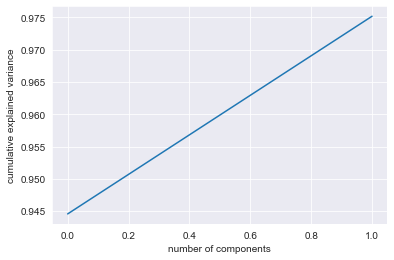

In [244]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [245]:
# get eigenvalues (variance explained by each PC)  
pca.explained_variance_




array([8.50117001, 0.27553023])